In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
from glob import glob

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

In [2]:
df=pd.read_csv("df_EDA.csv")
df.head()

Unnamed: 0  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0           1        1      1           6          4  2022-01-06   
1           2        1      1           6          4  2022-01-06   
2           3        1      1           6          4  2022-01-06   
3           4        1      1           6          4  2022-01-06   
4           5        1      1           6          4  2022-01-06   

         Airlines         OriginCityName           DestCityName  DepDelay  \
0  Delta Airlines            Atlanta, GA    Fort Lauderdale, FL      -4.0   
1  Delta Airlines    Fort Lauderdale, FL            Atlanta, GA      -2.0   
2  Delta Airlines    Fort Lauderdale, FL     Raleigh/Durham, NC      -5.0   
3  Delta Airlines            Atlanta, GA  Jackson/Vicksburg, MS      -4.0   
4  Delta Airlines  Jackson/Vicksburg, MS            Atlanta, GA      -7.0   

   ArrDelay  AirTime  Distance Month_Str DayOfWeek_Str  Flight_Status  
0      -1.0     93.0     581.0       Jan           Thu              0  
1     -12.0     83.0     581.0       Jan           Thu              0  
2     -15.0     93.0     680.0       Jan           Thu              0  
3     -11.0     60.0     341.0       Jan           Thu              0  
4     -23.0     49.0     341.0       Jan           Thu              0

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.shape

(6804006, 15)

In [5]:
df.isnull().sum()

Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
ArrDelay          0
AirTime           0
Distance          0
Month_Str         0
DayOfWeek_Str     0
Flight_Status     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804006 entries, 0 to 6804005
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Quarter         int64  
 1   Month           int64  
 2   DayofMonth      int64  
 3   DayOfWeek       int64  
 4   FlightDate      object 
 5   Airlines        object 
 6   OriginCityName  object 
 7   DestCityName    object 
 8   DepDelay        float64
 9   ArrDelay        float64
 10  AirTime         float64
 11  Distance        float64
 12  Month_Str       object 
 13  DayOfWeek_Str   object 
 14  Flight_Status   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 778.7+ MB


In [7]:
df['Airlines'] = df['Airlines'].astype('category')
df['OriginCityName'] = df['OriginCityName'].astype('category')
df['DestCityName'] = df['DestCityName'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804006 entries, 0 to 6804005
Data columns (total 15 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Quarter         int64   
 1   Month           int64   
 2   DayofMonth      int64   
 3   DayOfWeek       int64   
 4   FlightDate      object  
 5   Airlines        category
 6   OriginCityName  category
 7   DestCityName    category
 8   DepDelay        float64 
 9   ArrDelay        float64 
 10  AirTime         float64 
 11  Distance        float64 
 12  Month_Str       object  
 13  DayOfWeek_Str   object  
 14  Flight_Status   int64   
dtypes: category(3), float64(4), int64(5), object(3)
memory usage: 655.4+ MB


In [9]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Airlines',
       'OriginCityName', 'DestCityName', 'DepDelay', 'ArrDelay', 'AirTime',
       'Distance', 'Month_Str', 'DayOfWeek_Str', 'Flight_Status'],
      dtype='object')

In [10]:
df["Airlines"].value_counts()

American Airlines     1704516
Delta Airlines        1416198
Southwest Airlines    1261273
United Airlines       1225936
Alaska Airlines        373159
JetBlue Airways        261821
Spirit Airlines        225008
Frontier Airlines      150743
Allegiant Air          112466
Hawaiian Airlines       72886
Name: Airlines, dtype: int64

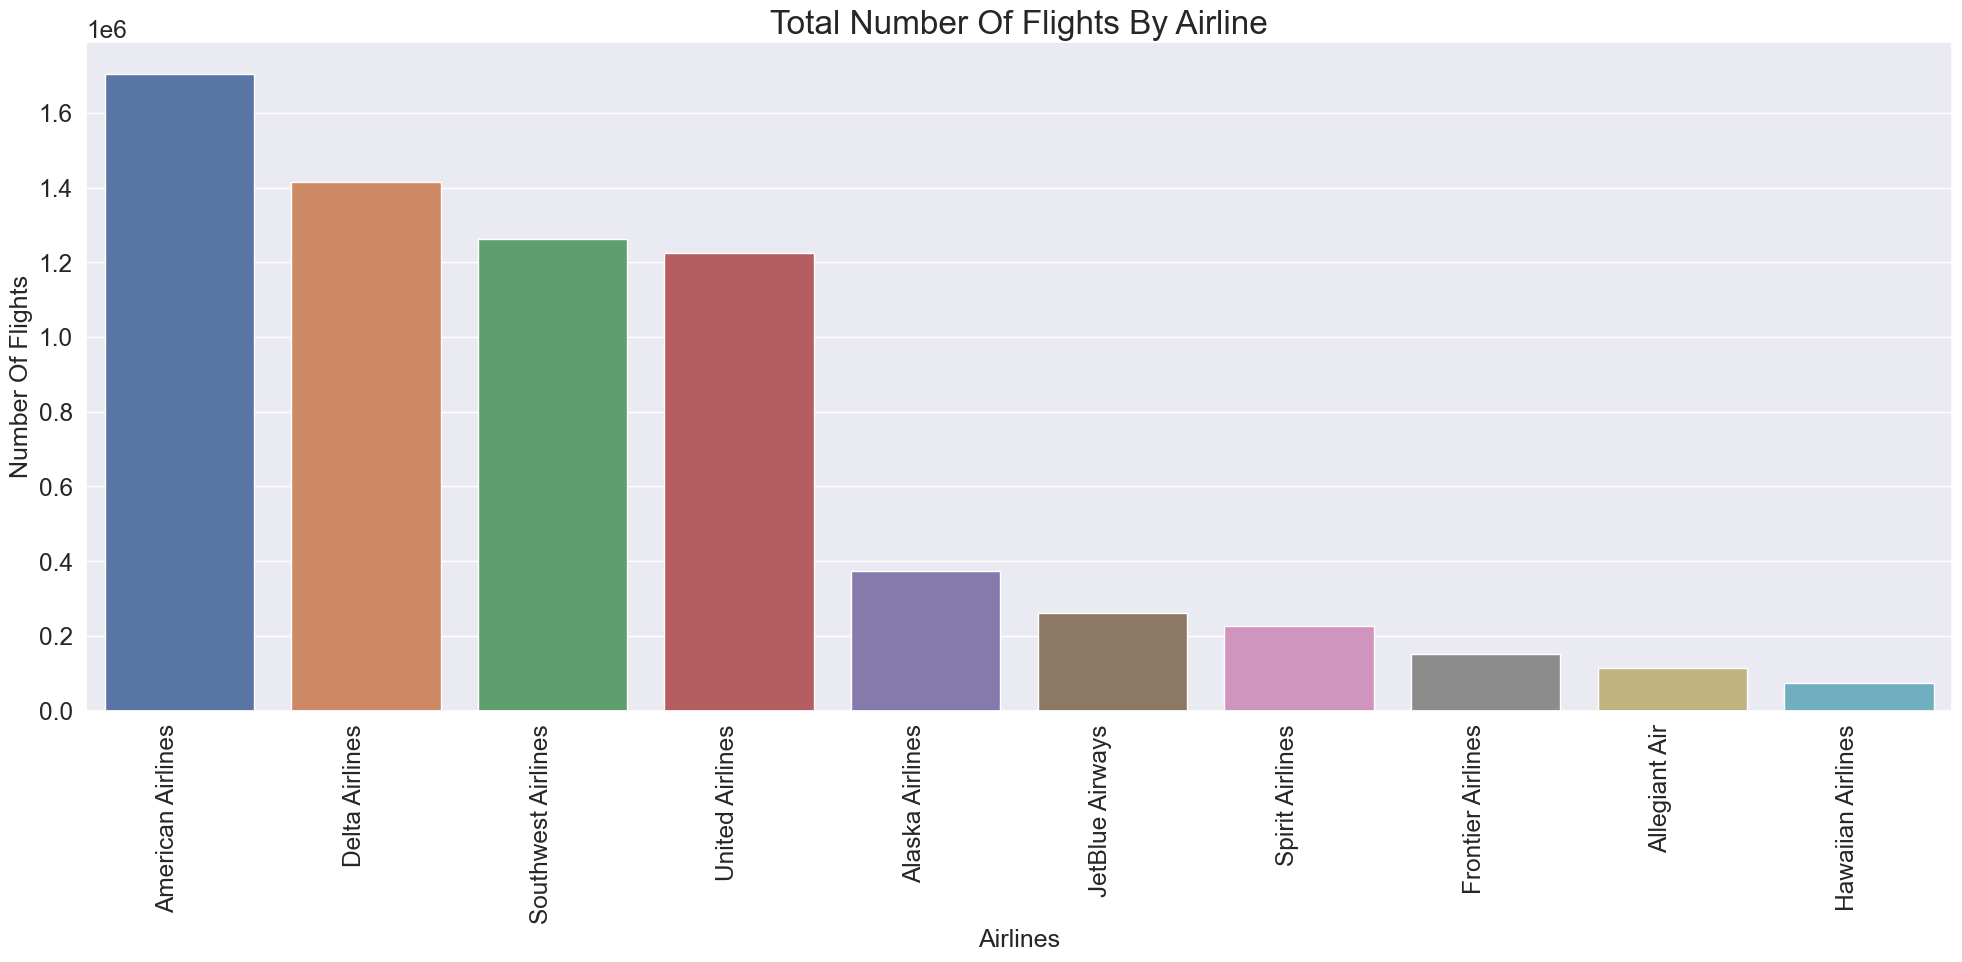

In [11]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['Airlines'], data=df, order=df['Airlines'].value_counts().index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Total Number Of Flights By Airline', fontsize=24)
plt.xlabel('Airlines', fontsize=18)
plt.ylabel('Number Of Flights', fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
df.Flight_Status.value_counts(normalize=True)

0    0.797357
1    0.202643
Name: Flight_Status, dtype: float64

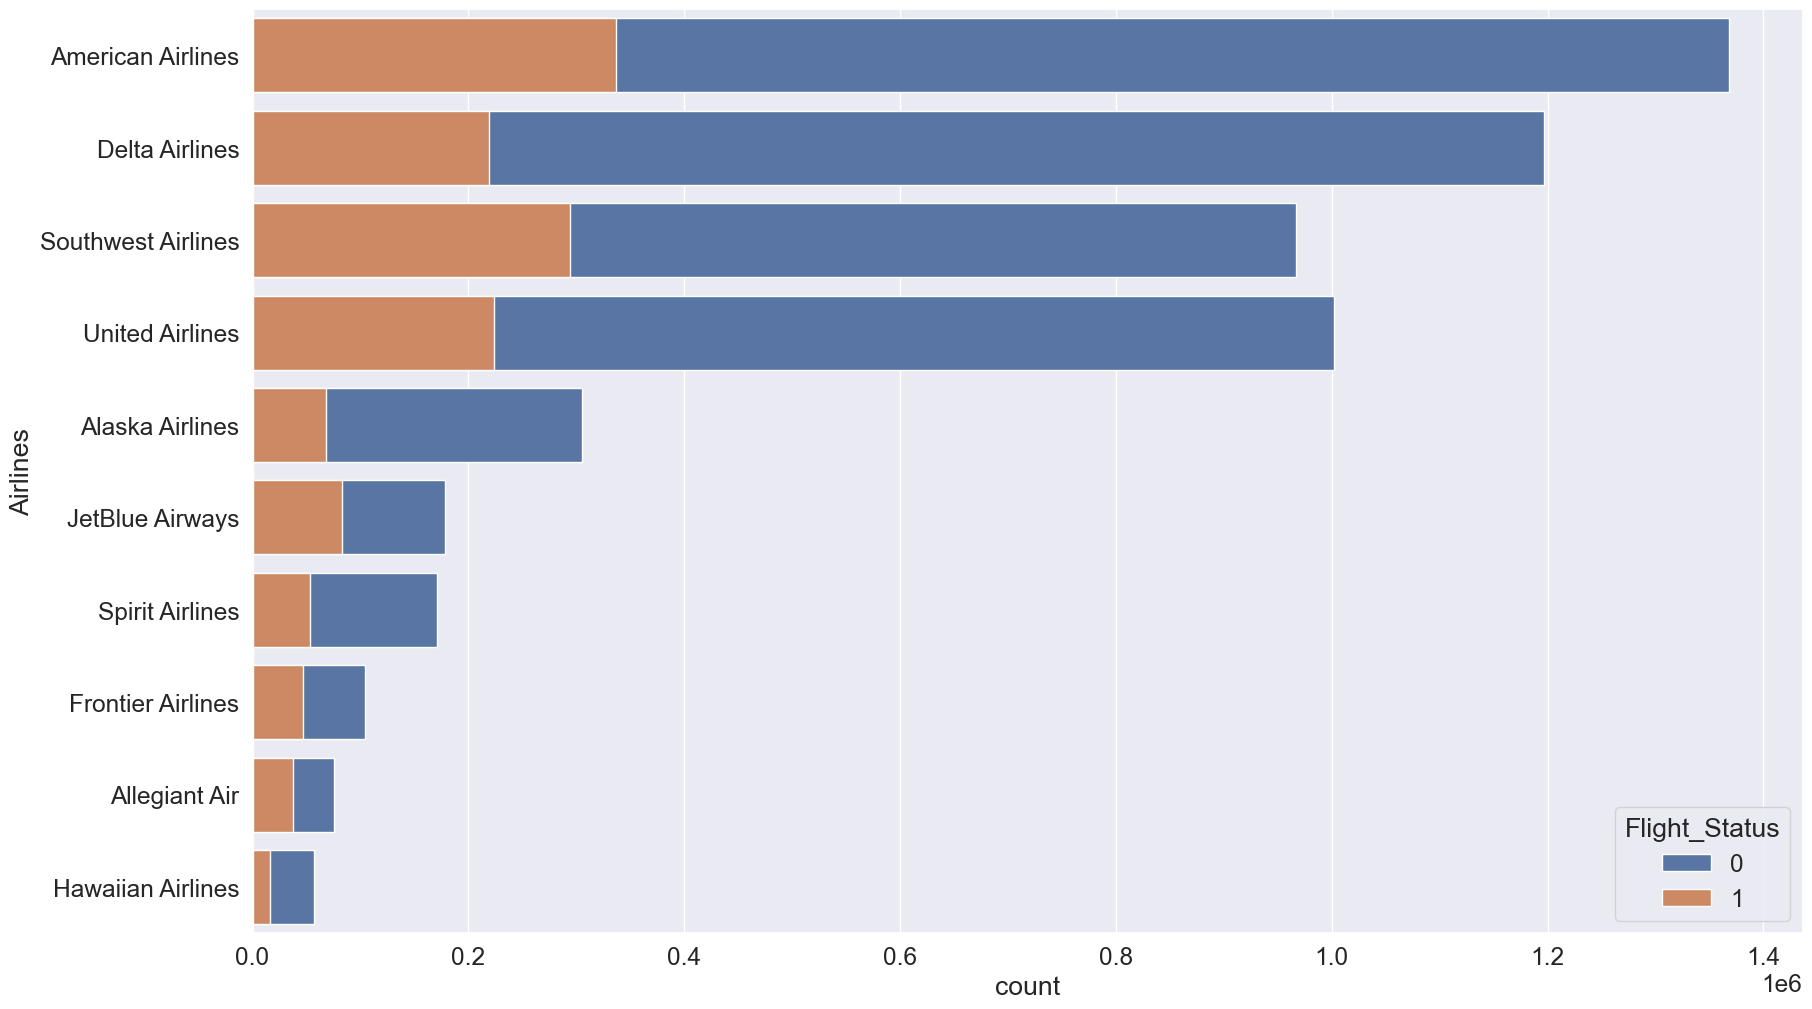

In [13]:
# Delay categories per Airline.
plt.figure(figsize=(20,12))
airline_order = df['Airlines'].value_counts().index.tolist()
sns.countplot(data=df, y='Airlines', order=airline_order, hue='Flight_Status', dodge=False)
plt.show()

In [14]:
df.pivot_table(values=["ArrDelay", "DepDelay", "AirTime","Distance"],
               columns="Airlines",
               aggfunc=np.mean)

Airlines  Alaska Airlines  Allegiant Air  American Airlines  Delta Airlines  \
AirTime        135.538435     121.712624         103.455694      103.914686   
ArrDelay         4.171707      19.482973           7.781472        3.171600   
DepDelay         6.245780      18.469128          11.953885        9.776997   
Distance       998.979743     899.429321         728.809217      743.782715   

Airlines  Frontier Airlines  Hawaiian Airlines  JetBlue Airways  \
AirTime          131.759020         122.088796       153.866615   
ArrDelay          17.393756           8.759556        18.181891   
DepDelay          21.077145           9.884093        23.045187   
Distance         974.200348         950.834234      1144.934677   

Airlines  Southwest Airlines  Spirit Airlines  United Airlines  
AirTime            99.877720       135.159488       113.958177  
ArrDelay            7.136936        10.112618         5.405376  
DepDelay           14.422162        14.253080        11.834922  
Distance          720.608204      1005.135560       823.194180

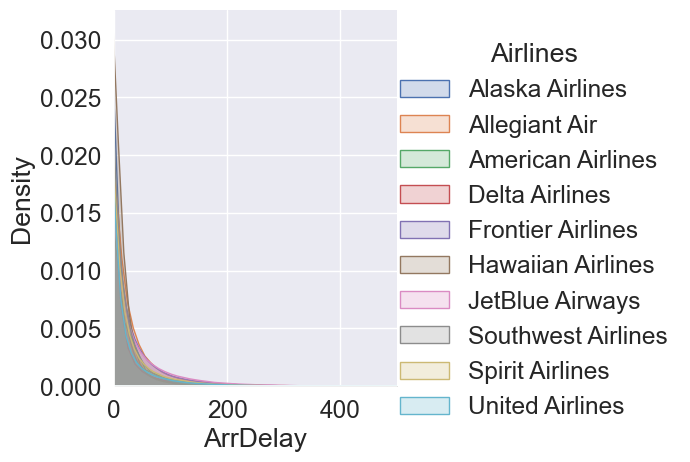

In [15]:
(sns
 .FacetGrid(df,
           hue="Airlines",
           height=5,
           xlim=(0,500))
 .map(sns.kdeplot,"ArrDelay",fill=True)         
 .add_legend()
);

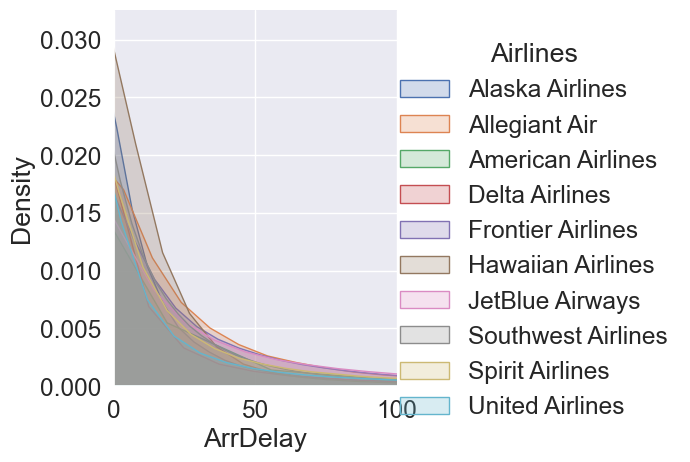

In [16]:
(sns
 .FacetGrid(df,
           hue="Airlines",
           height=5,
           xlim=(0,100))
 .map(sns.kdeplot,"ArrDelay",fill=True)         
 .add_legend()
);

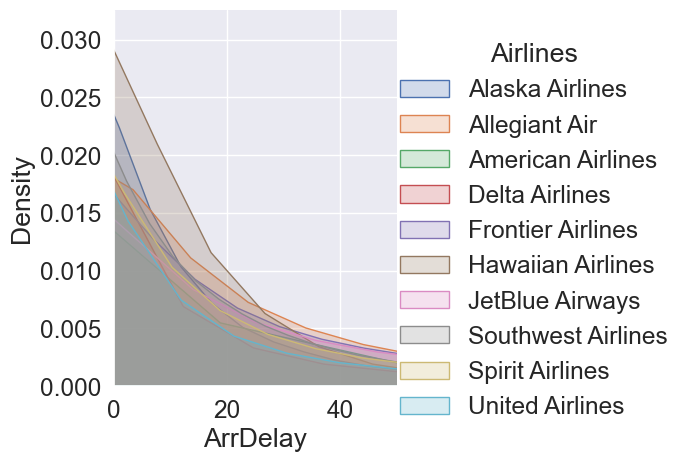

In [17]:
(sns
 .FacetGrid(df,
           hue="Airlines",
           height=5,
           xlim=(0,50))
 .map(sns.kdeplot,"ArrDelay",fill=True)         
 .add_legend()
);

In [18]:
# Creating the new dataframe with the columns Airlines and Flight Status
df_AFS = df[['Airlines', 'Flight_Status']]
df_AFS.head()

Airlines  Flight_Status
0  Delta Airlines              0
1  Delta Airlines              0
2  Delta Airlines              0
3  Delta Airlines              0
4  Delta Airlines              0

In [19]:
df_AFS.shape

(6804006, 2)

In [20]:
df_AFS.Flight_Status.value_counts()

0    5425219
1    1378787
Name: Flight_Status, dtype: int64

In [21]:
# Creating another dataframe grouping the airline names and adding all the Flight_Status values to get all delayed flights
fs = df_AFS.groupby(['Airlines']).sum().reset_index()
fs

Airlines  Flight_Status
0     Alaska Airlines          67740
1       Allegiant Air          37221
2   American Airlines         336683
3      Delta Airlines         219187
4   Frontier Airlines          46677
5   Hawaiian Airlines          16211
6     JetBlue Airways          83323
7  Southwest Airlines         294255
8     Spirit Airlines          53730
9     United Airlines         223760

In [22]:
# Creating another dataframe from the value_counts directly to obtain all the flights added per airline and rename the axis to Airlines and reset_index to Total_Flights
tf = df.Airlines.value_counts().rename_axis('Airlines').reset_index(name='Total_Flights')
tf

Airlines  Total_Flights
0   American Airlines        1704516
1      Delta Airlines        1416198
2  Southwest Airlines        1261273
3     United Airlines        1225936
4     Alaska Airlines         373159
5     JetBlue Airways         261821
6     Spirit Airlines         225008
7   Frontier Airlines         150743
8       Allegiant Air         112466
9   Hawaiian Airlines          72886

In [23]:
# Merging the two dataframes using the Airlines as the common column
fs_tf = pd.merge(fs, tf, on='Airlines')
fs_tf 

Airlines  Flight_Status  Total_Flights
0     Alaska Airlines          67740         373159
1       Allegiant Air          37221         112466
2   American Airlines         336683        1704516
3      Delta Airlines         219187        1416198
4   Frontier Airlines          46677         150743
5   Hawaiian Airlines          16211          72886
6     JetBlue Airways          83323         261821
7  Southwest Airlines         294255        1261273
8     Spirit Airlines          53730         225008
9     United Airlines         223760        1225936

In [24]:
# Creating a new column that will represent the percentage of delay flights
fs_tf ['Percentage_Delayed'] = round((fs_tf ['Flight_Status']*100)/fs_tf ['Total_Flights'], 2)
fs_tf .rename({'Flight_Status': 'Delayed_Flights'}, axis=1, inplace=True)
fs_tf 


Airlines  Delayed_Flights  Total_Flights  Percentage_Delayed
0     Alaska Airlines            67740         373159               18.15
1       Allegiant Air            37221         112466               33.10
2   American Airlines           336683        1704516               19.75
3      Delta Airlines           219187        1416198               15.48
4   Frontier Airlines            46677         150743               30.96
5   Hawaiian Airlines            16211          72886               22.24
6     JetBlue Airways            83323         261821               31.82
7  Southwest Airlines           294255        1261273               23.33
8     Spirit Airlines            53730         225008               23.88
9     United Airlines           223760        1225936               18.25

In [25]:
df_AFS.Flight_Status.value_counts()

0    5425219
1    1378787
Name: Flight_Status, dtype: int64

In [26]:
# Checking total delayed flights match each other
delaySUM = fs_tf.Delayed_Flights.sum()
print('Total number of delayed flights:', delaySUM)

Total number of delayed flights: 1378787


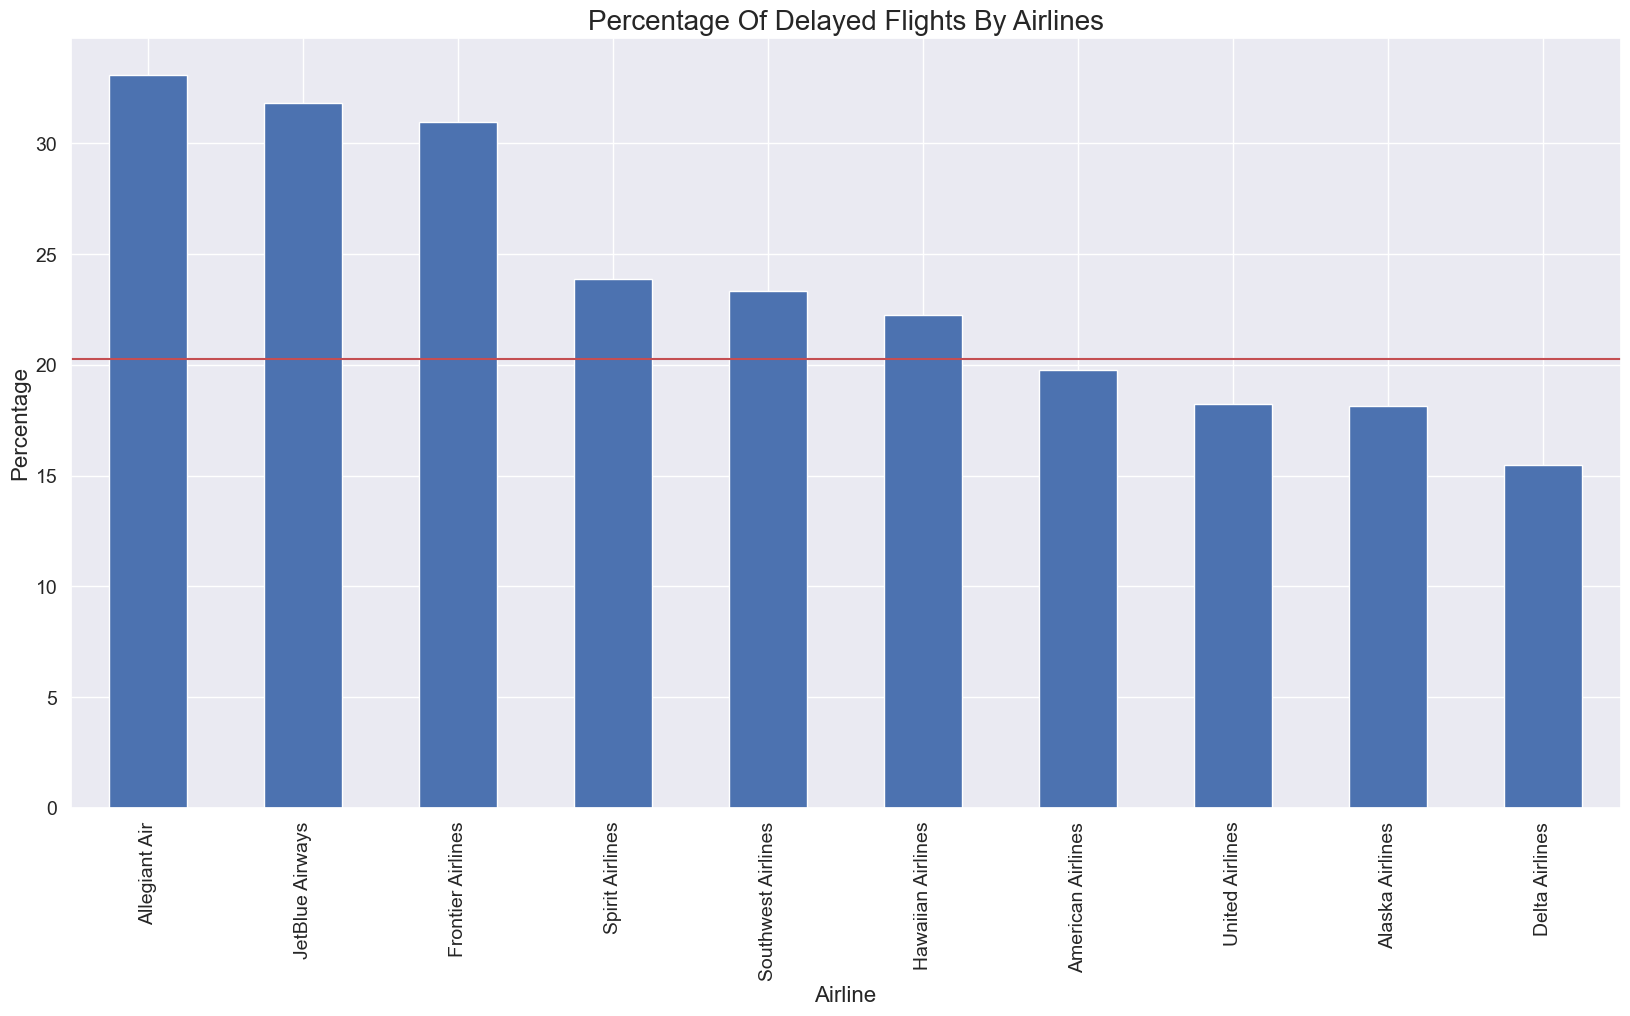

In [27]:
# Plot with the 20,26% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
fs_tf.groupby('Airlines').Percentage_Delayed.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=20.26, xmin=-1, xmax=10, colors='r', linestyles='solid', label='cutoff')
plt.title('Percentage Of Delayed Flights By Airlines', fontsize=20)
plt.xlabel('Airline', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

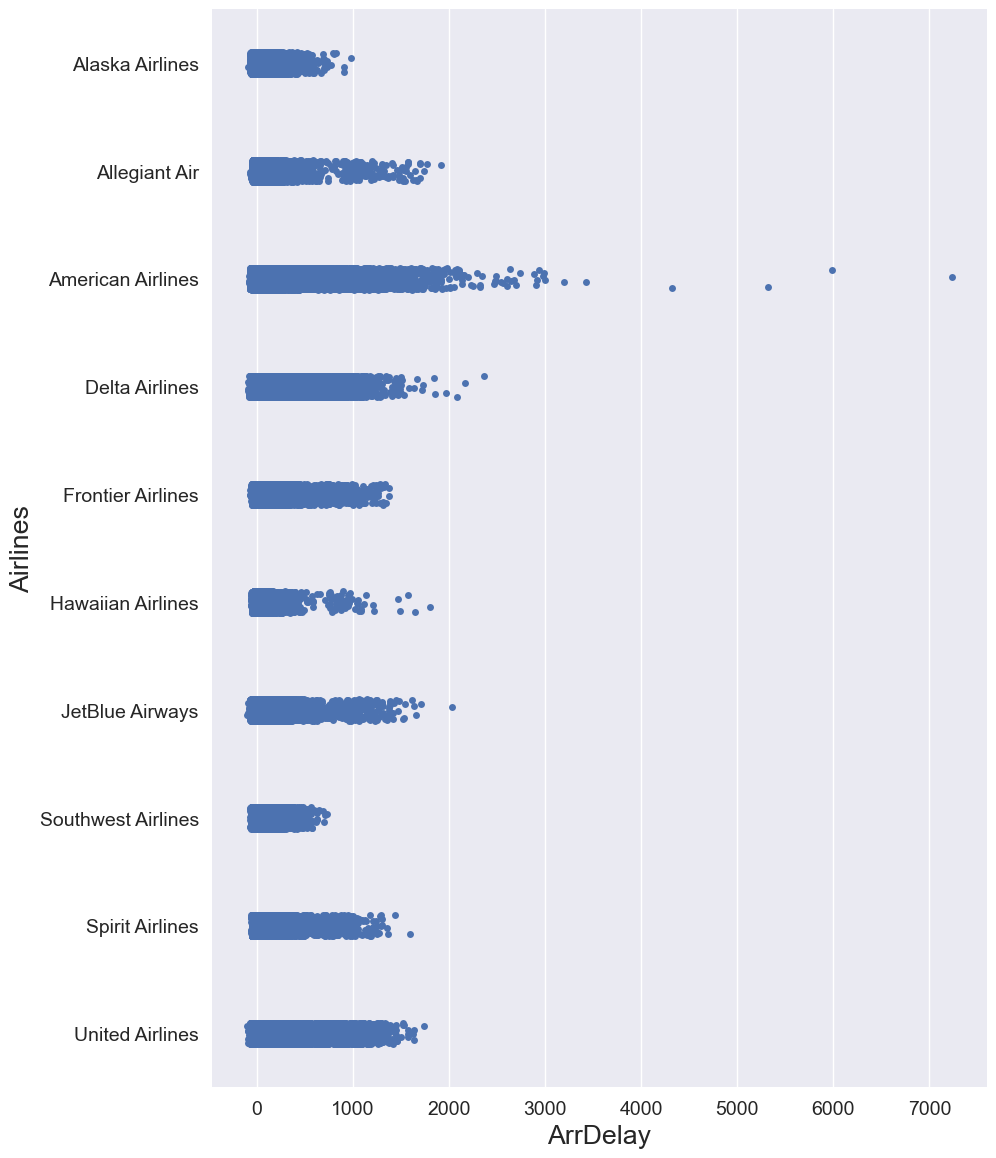

In [28]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observation with Scatter Plot
sns.stripplot(x="ArrDelay", y="Airlines",
              data = df, dodge=True, jitter=True
            )
plt.show()

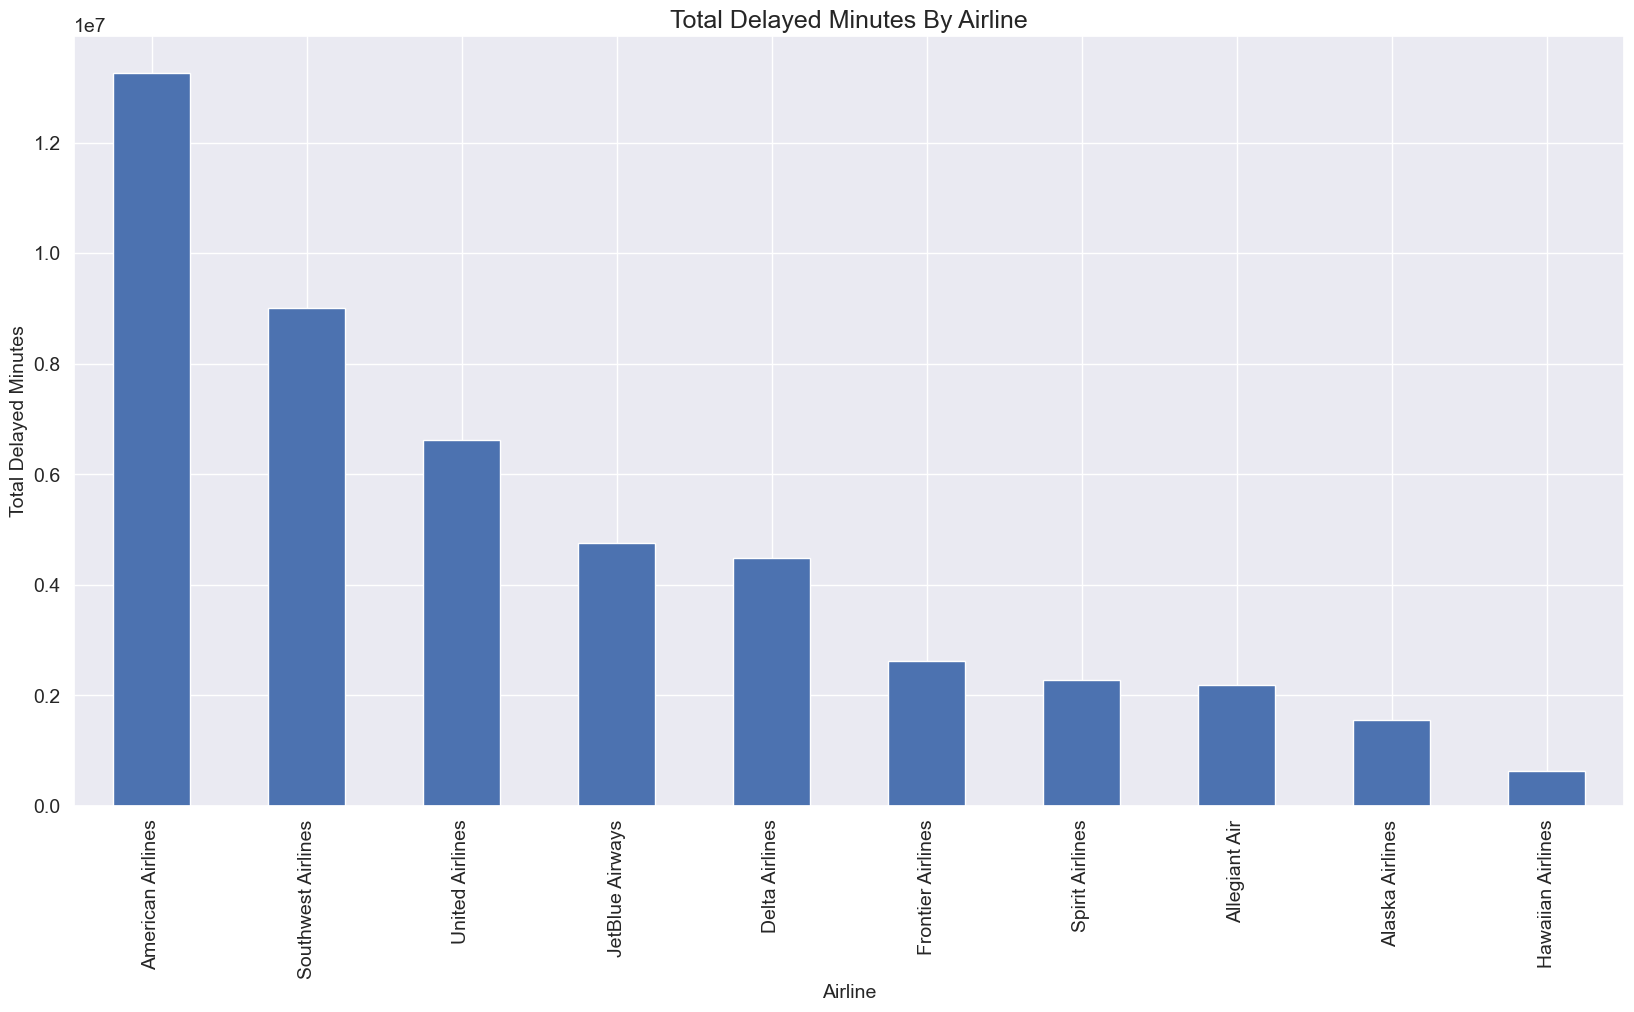

In [29]:
plt.figure(figsize=(20, 10))
df.groupby('Airlines').ArrDelay.sum().sort_values(ascending=False).plot.bar()
plt.title('Total Delayed Minutes By Airline', fontsize=18)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Total Delayed Minutes', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

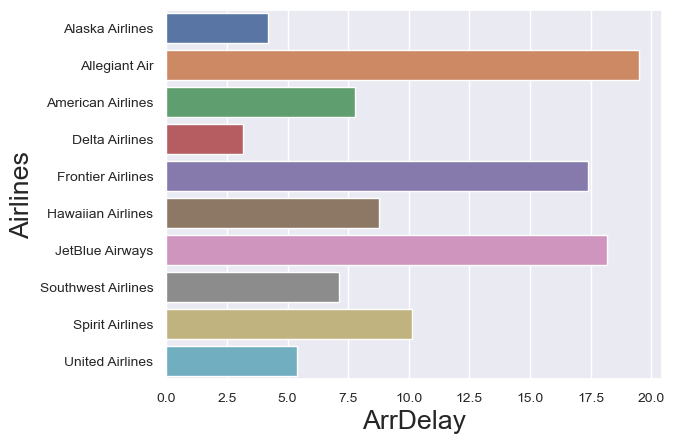

In [30]:
a = df.groupby('Airlines')['ArrDelay'].mean()
sns.barplot(y = a.index, x = a)
sns.set_style("whitegrid")
plt.show()

In [31]:
Avg_D = df[['Airlines', 'ArrDelay']]
Avg_D = Avg_D.groupby(['Airlines']).mean().reset_index()
Avg_D.rename({'ArrDelay': 'Avg_Delay'}, axis=1, inplace=True)
Avg_D = Avg_D.sort_values(['Avg_Delay']).reset_index(drop=True)
Avg_D.head(10)

Airlines  Avg_Delay
0      Delta Airlines   3.171600
1     Alaska Airlines   4.171707
2     United Airlines   5.405376
3  Southwest Airlines   7.136936
4   American Airlines   7.781472
5   Hawaiian Airlines   8.759556
6     Spirit Airlines  10.112618
7   Frontier Airlines  17.393756
8     JetBlue Airways  18.181891
9       Allegiant Air  19.482973

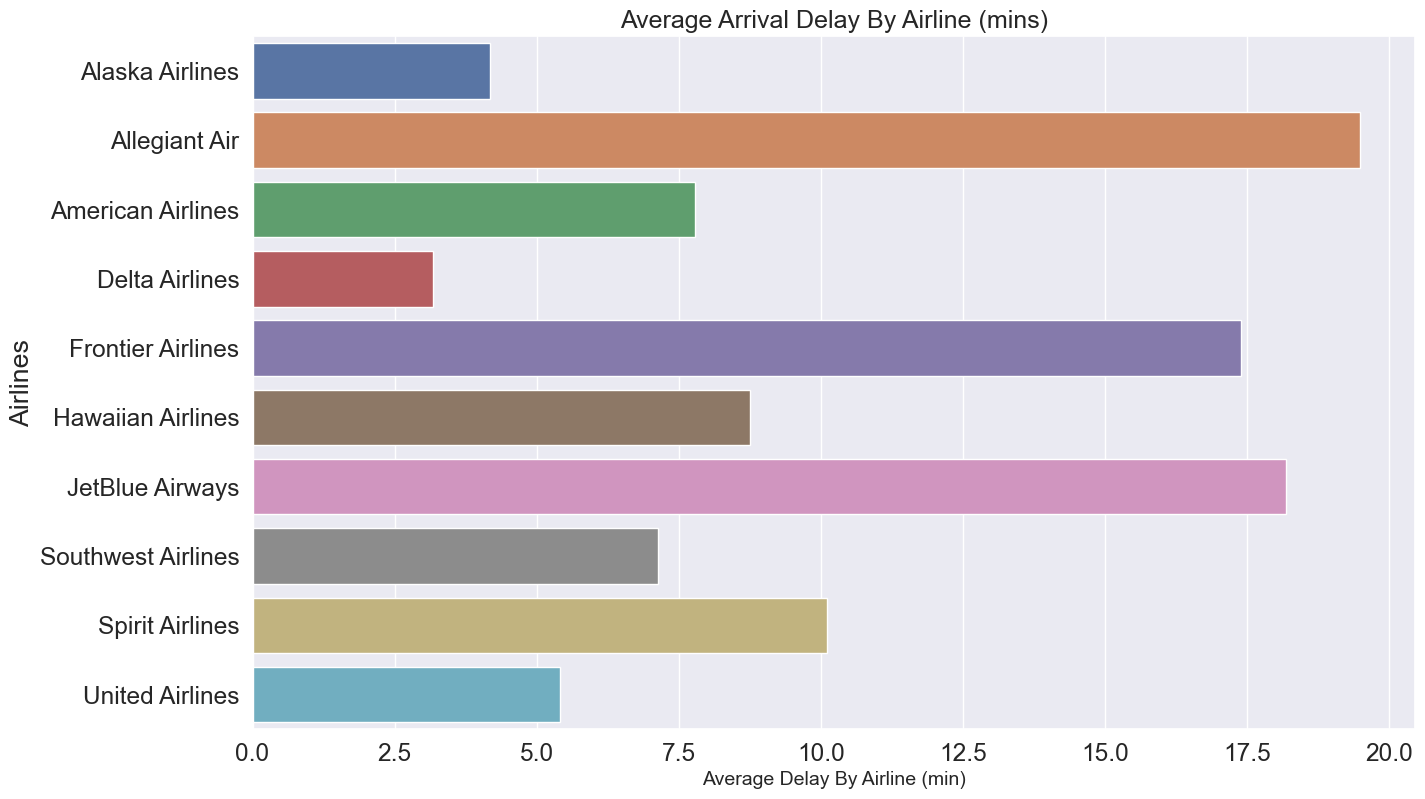

In [32]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='Avg_Delay', y='Airlines', data=Avg_D)
ax.set_title('Average Arrival Delay By Airline (mins)', fontsize=18)
ax.set_xlabel('Average Delay By Airline (min)', fontsize=14)
plt.show()

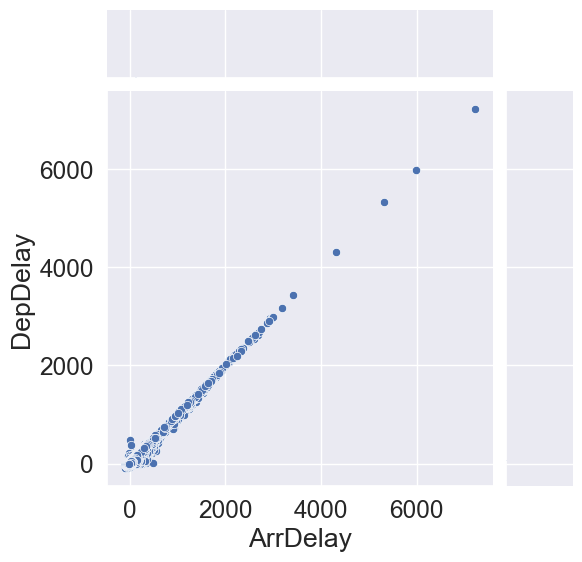

In [33]:
sns.jointplot(x="ArrDelay", y=df["DepDelay"], data=df)
plt.show()

<Axes: xlabel='ArrDelay', ylabel='DepDelay'>

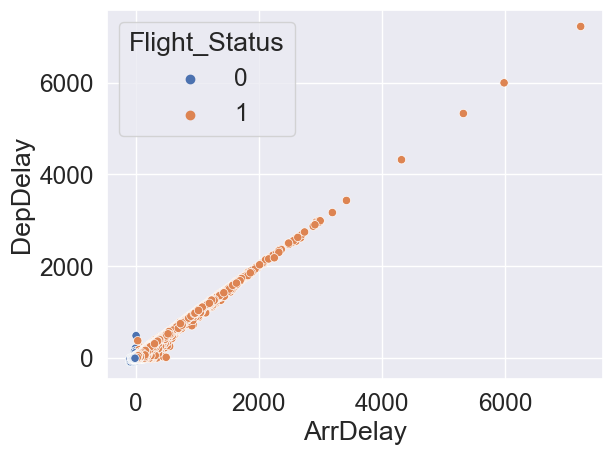

In [34]:
sns.scatterplot(x="ArrDelay",y="DepDelay",hue="Flight_Status",data=df)

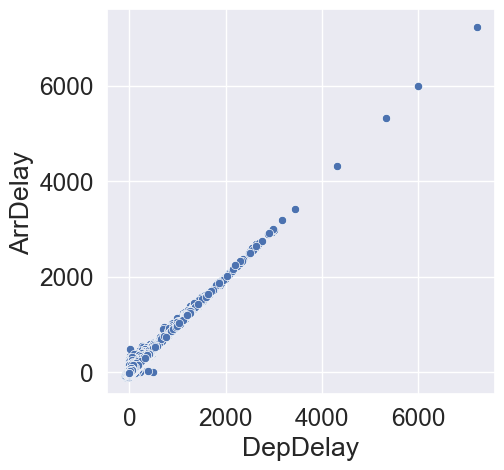

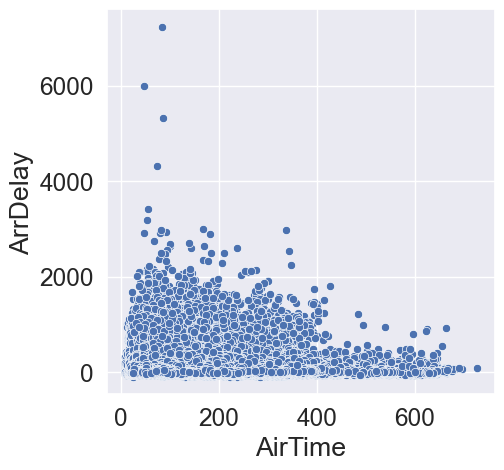

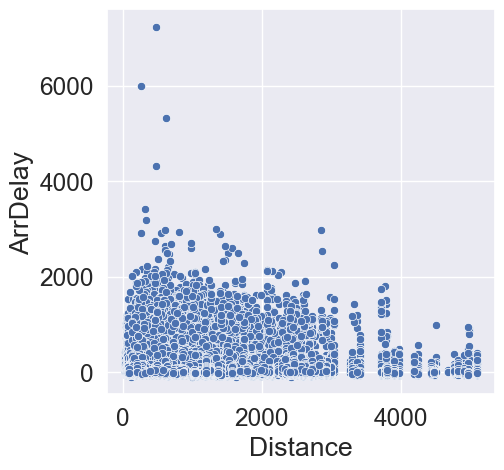

In [35]:
cols = ["DepDelay", "AirTime", "Distance"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="ArrDelay", data=df)

plt.show()

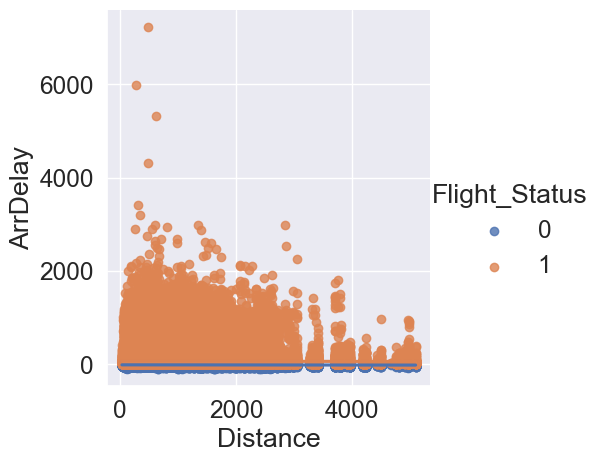

In [36]:
sns.lmplot(x="Distance",y="ArrDelay",hue="Flight_Status",data=df);

# 30 Most Common Destination (Cities)

In [37]:
df.DestCityName.value_counts()

Chicago, IL              360585
Atlanta, GA              311987
New York, NY             292433
Denver, CO               270416
Dallas/Fort Worth, TX    267438
                          ...  
Wilmington, DE               42
Ogden, UT                    27
Watertown, SD                 2
Pierre, SD                    2
Bullhead City, AZ             1
Name: DestCityName, Length: 370, dtype: int64

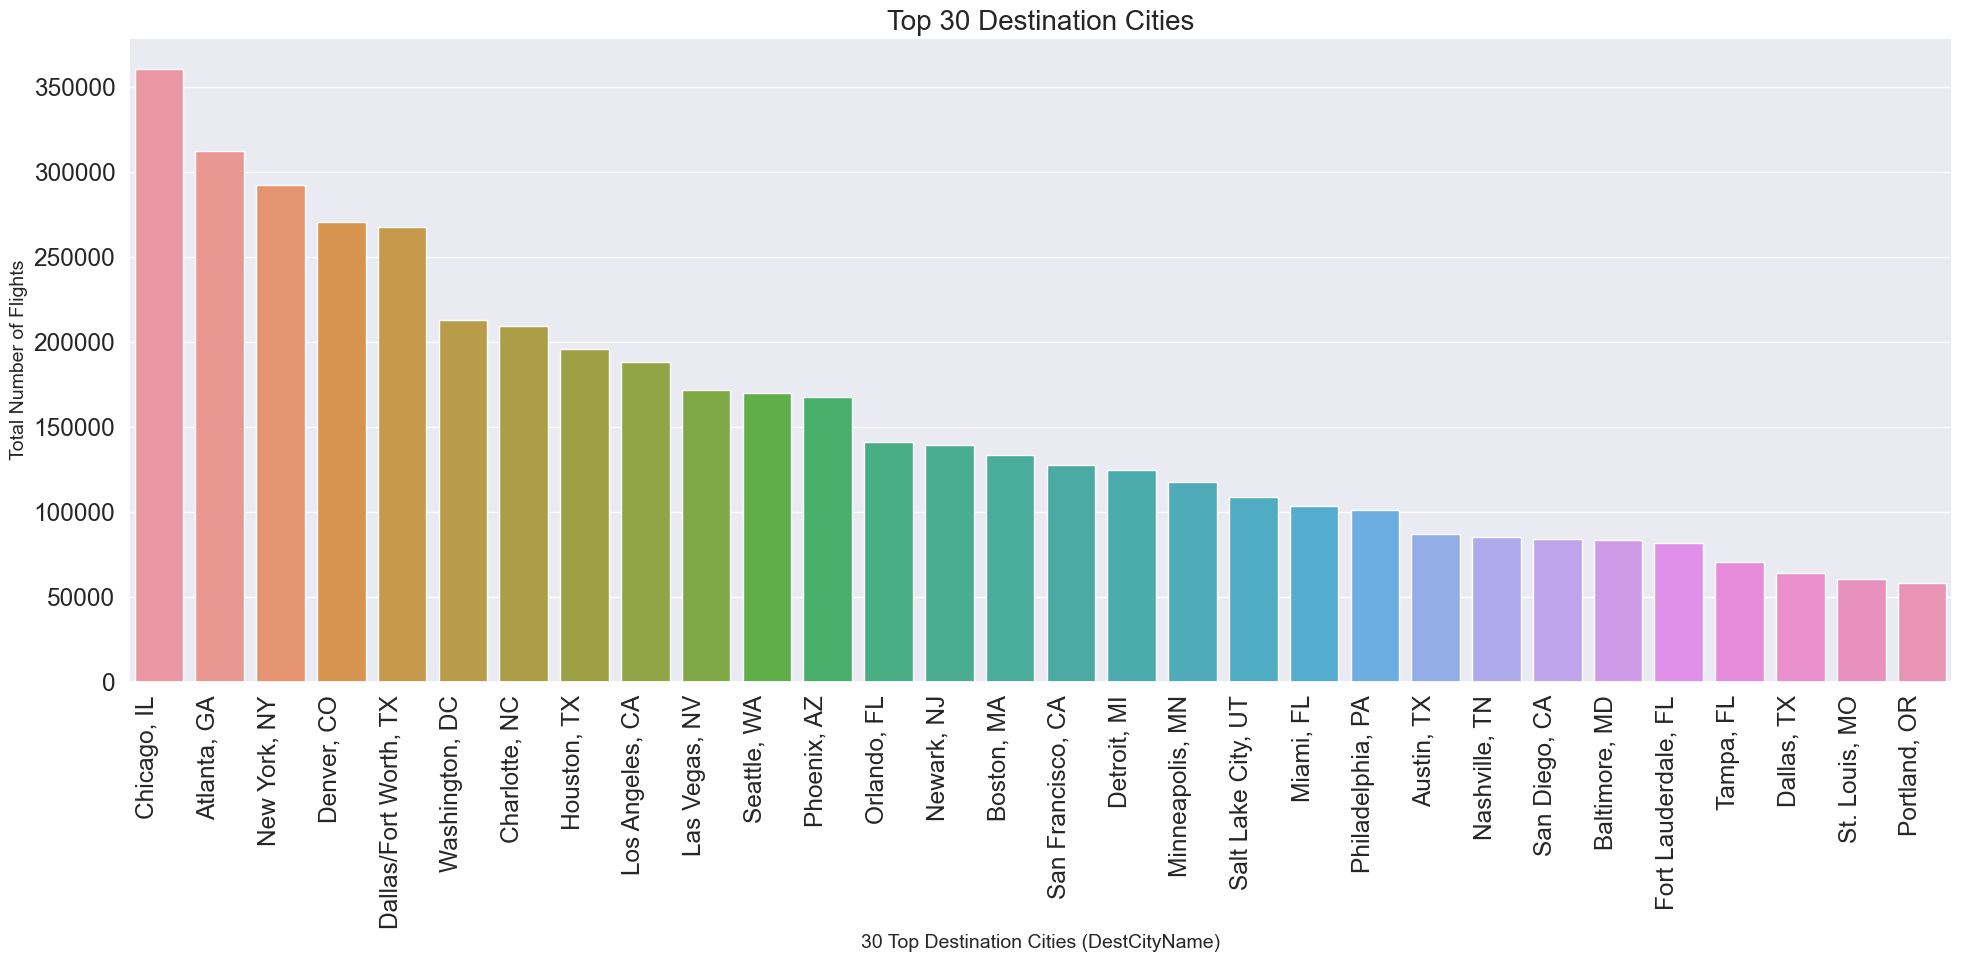

In [38]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['DestCityName'], data=df, order=df['DestCityName'].value_counts().iloc[0:30].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DestCityName)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

# Worst & Best months to travel based on flight delays

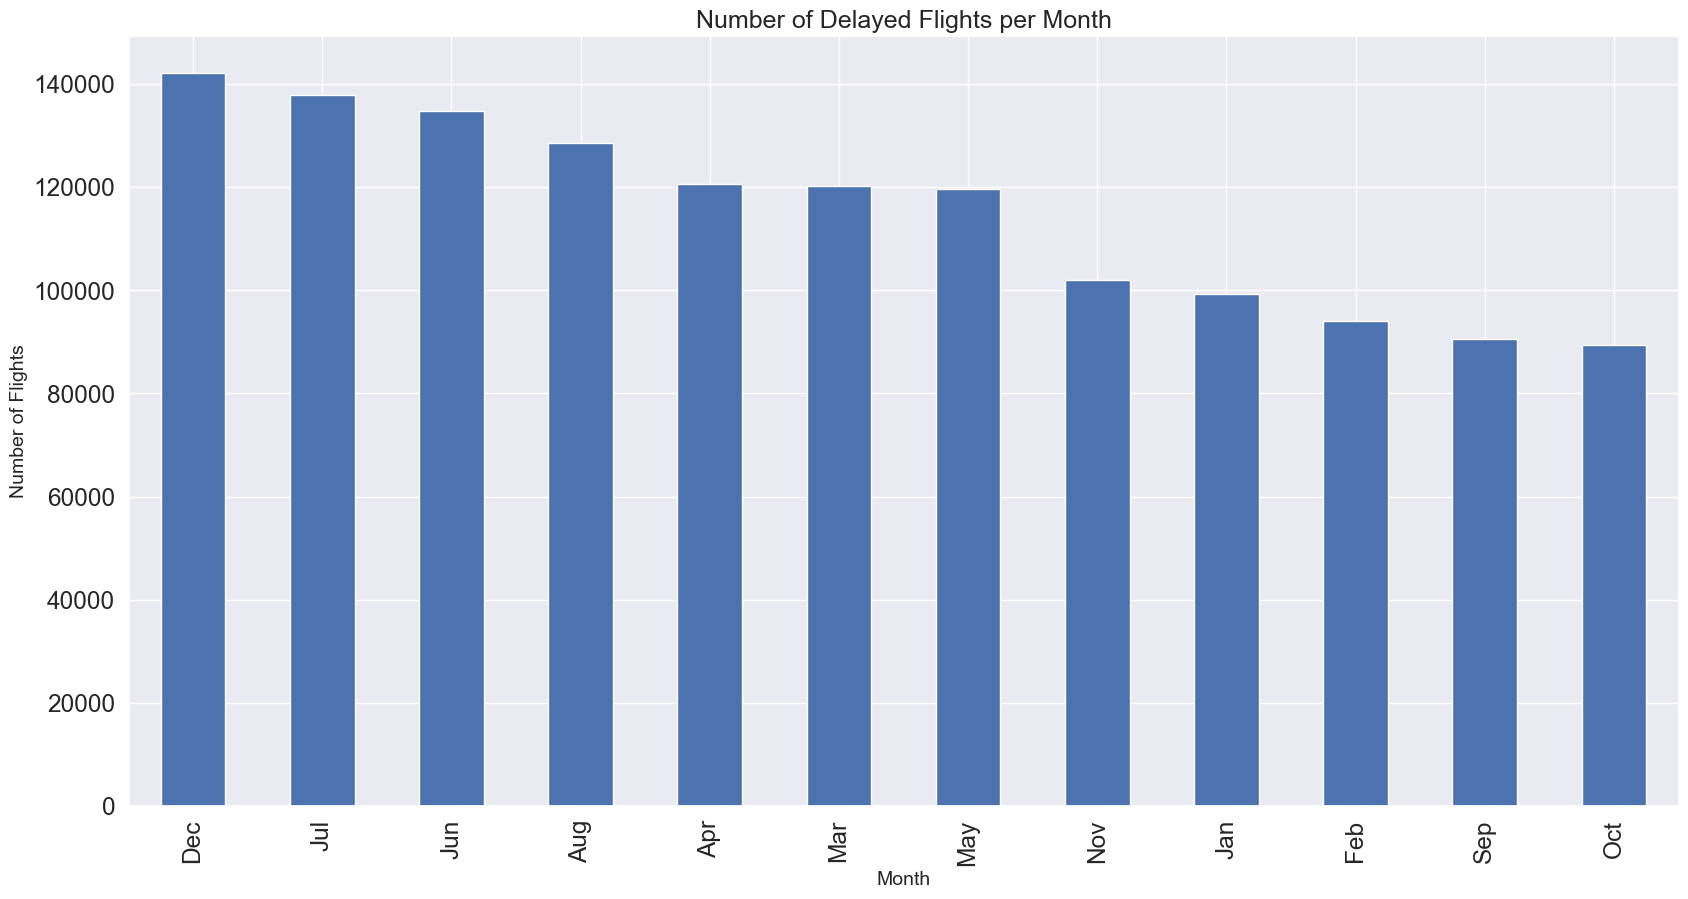

In [39]:
plt.figure(figsize=(20, 10))
df.groupby('Month_Str').Flight_Status.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

In [40]:
import plotly.graph_objects as go

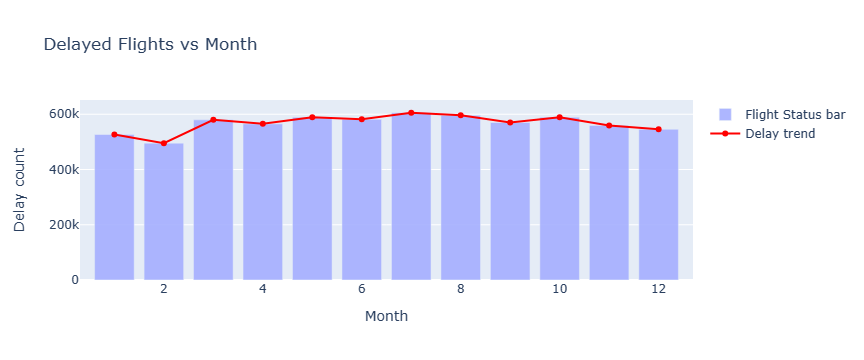

In [41]:
plot1 = df.groupby('Month')['Flight_Status'].count()
fig = go.Figure()

fig.add_trace(go.Bar(x=plot1.index, y=plot1.values, name='Flight Status bar',opacity=0.9,marker_color='#a5afff'))

fig.add_trace(go.Scatter(x=plot1.index, y=plot1.values, line=dict(color='red'), name='Delay trend'))
fig.update_layout(
    title="Delayed Flights vs Month",
    xaxis_title="Month",
    yaxis_title="Delay count",
)
fig.show()

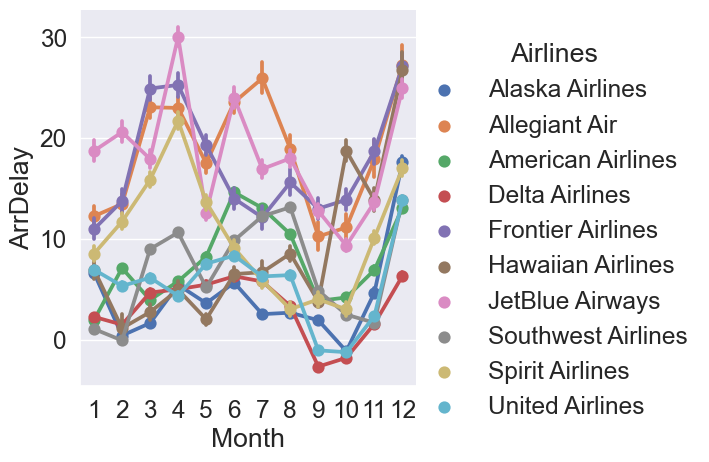

In [43]:
sns.catplot(x="Month", y="ArrDelay", hue="Airlines", kind="point", data=df)
plt.show()

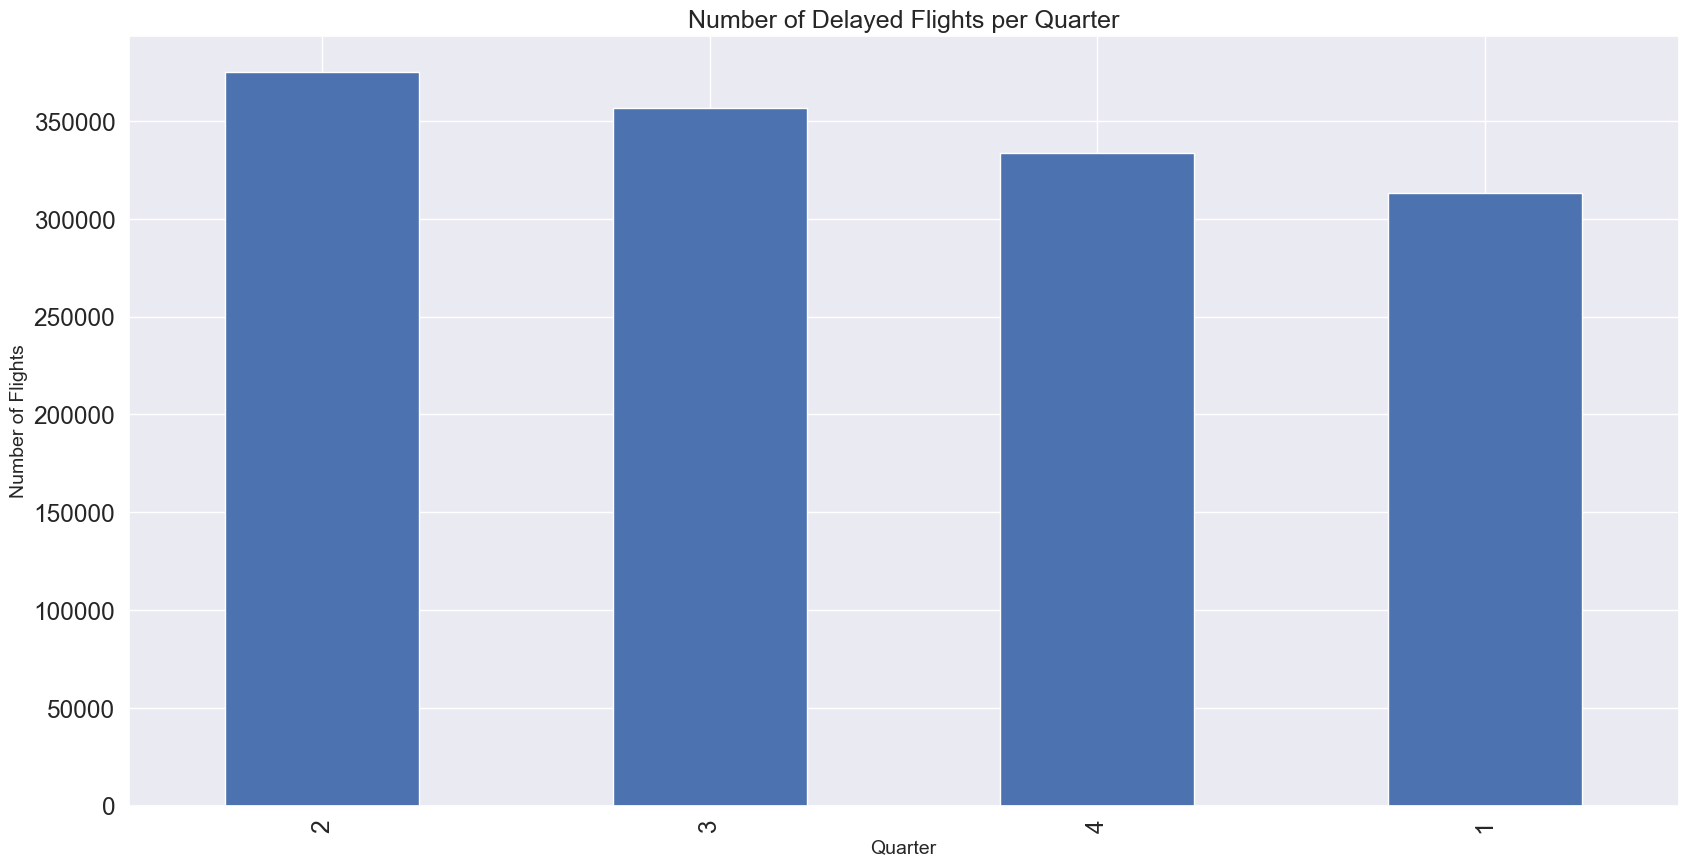

In [44]:
plt.figure(figsize=(20, 10))
df.groupby('Quarter').Flight_Status.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Quarter', fontsize=18)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

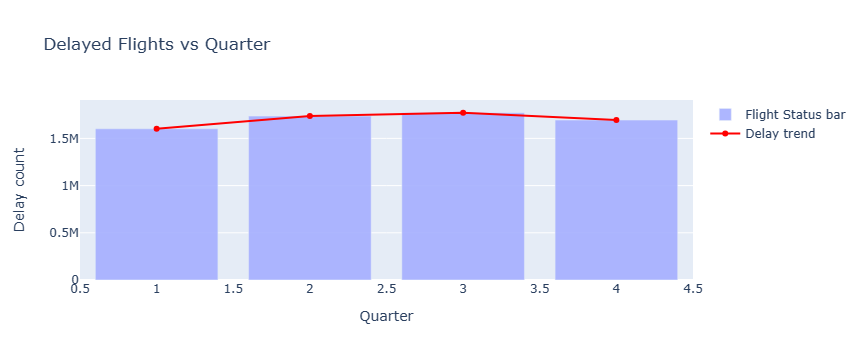

In [45]:
plot2 = df.groupby('Quarter')['Flight_Status'].count()
fig = go.Figure()

fig.add_trace(go.Bar(x=plot2.index, y=plot2.values, name='Flight Status bar',opacity=0.9,marker_color='#a5afff'))

fig.add_trace(go.Scatter(x=plot2.index, y=plot2.values, line=dict(color='red'), name='Delay trend'))
fig.update_layout(
    title="Delayed Flights vs Quarter",
    xaxis_title="Quarter",
    yaxis_title="Delay count",
)
fig.show()

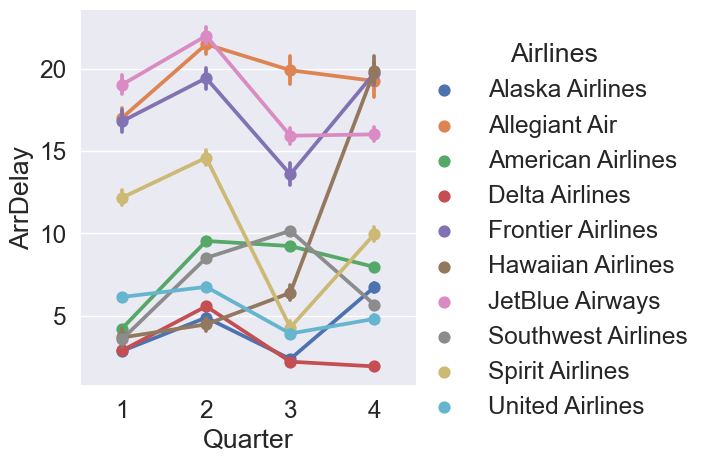

In [46]:
sns.catplot(x="Quarter", y="ArrDelay", hue="Airlines", kind="point", data=df)
plt.show()

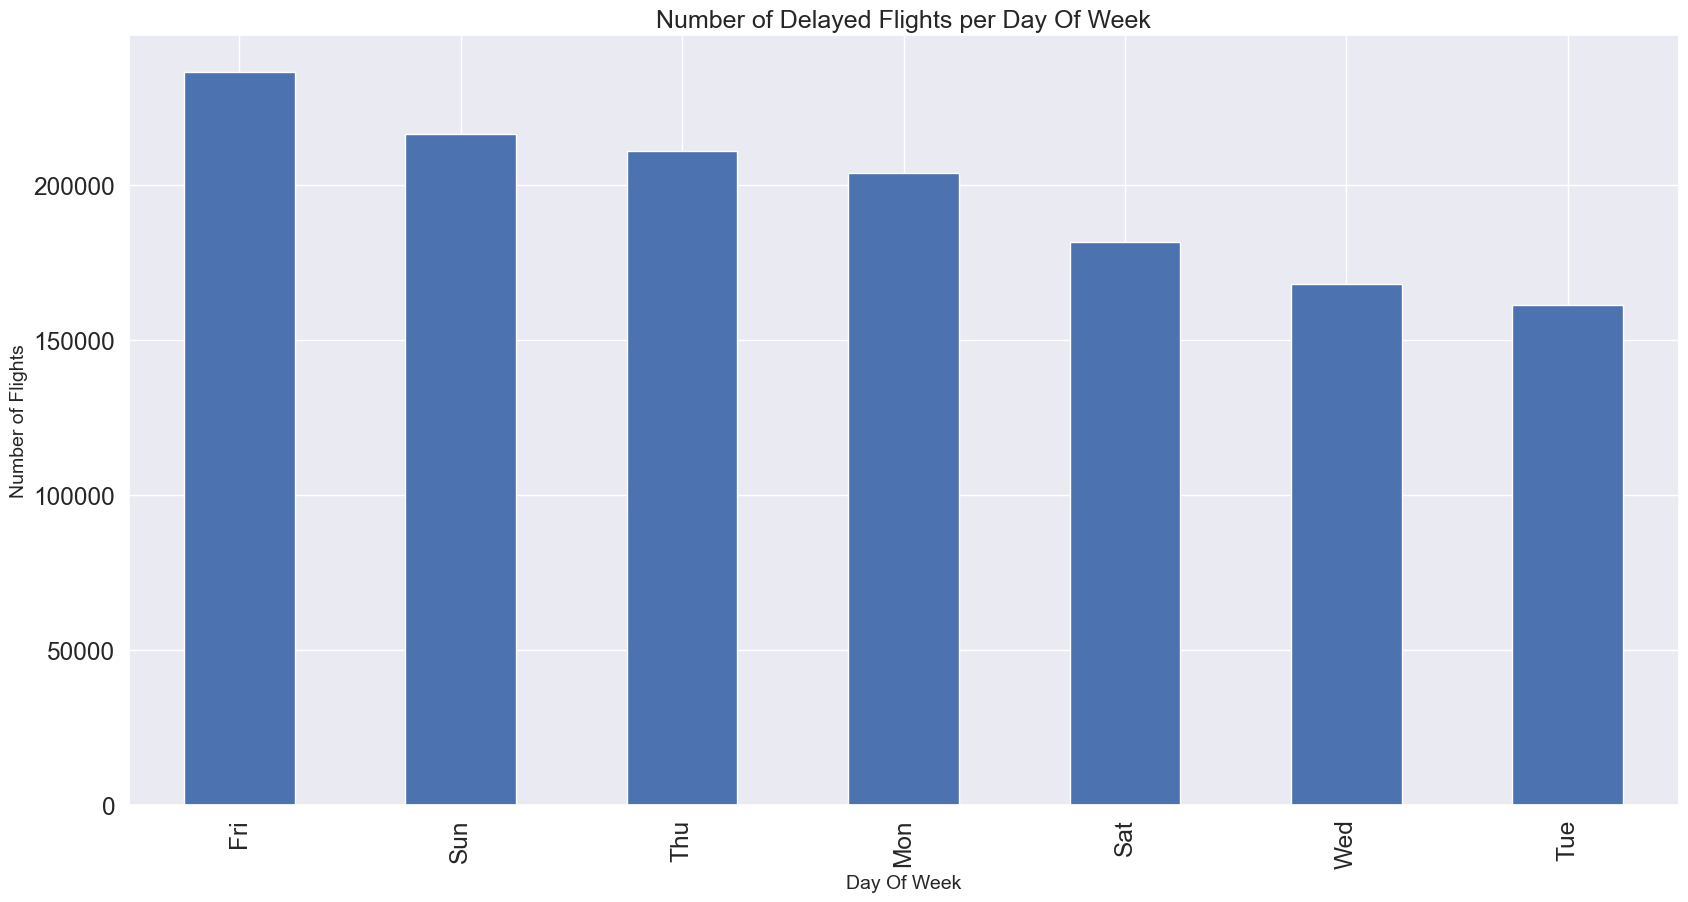

In [47]:
plt.figure(figsize=(20, 10))
df.groupby('DayOfWeek_Str').Flight_Status.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Day Of Week', fontsize=18)
plt.xlabel('Day Of Week', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

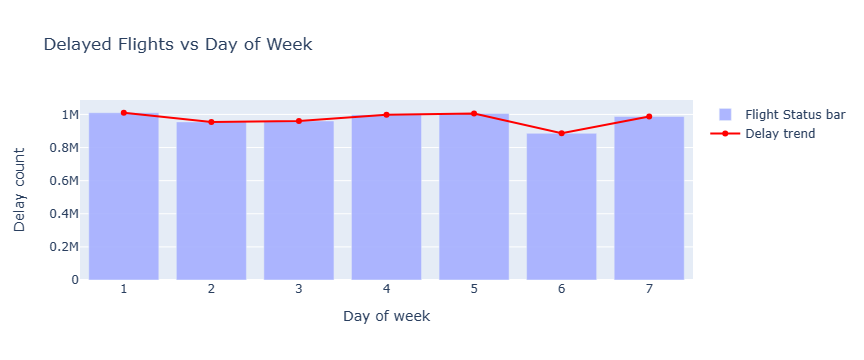

In [48]:
plot3 = df.groupby('DayOfWeek')['Flight_Status'].count()
fig = go.Figure()

fig.add_trace(go.Bar(x=plot3.index, y=plot3.values, name='Flight Status bar',opacity=0.9,marker_color='#a5afff'))

fig.add_trace(go.Scatter(x=plot3.index, y=plot3.values, line=dict(color='red'), name='Delay trend'))
fig.update_layout(
    title="Delayed Flights vs Day of Week",
    xaxis_title="Day of week",
    yaxis_title="Delay count",
)
fig.show()

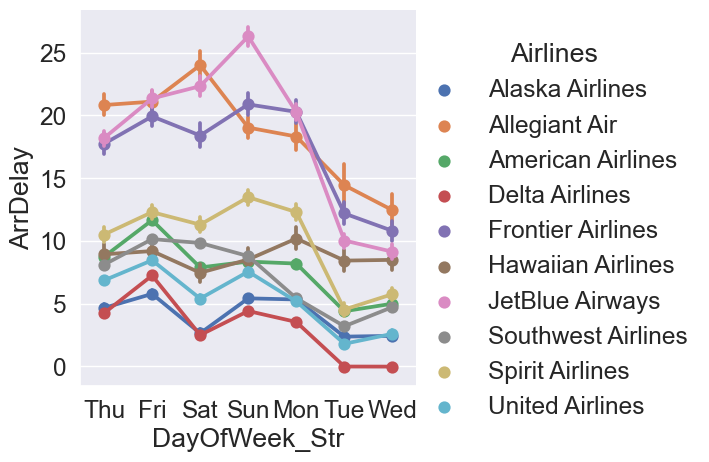

In [49]:
sns.catplot(x="DayOfWeek_Str", y="ArrDelay", hue="Airlines", kind="point", data=df)
plt.show()

<Axes: xlabel='DayOfWeek_Str', ylabel='ArrDelay'>

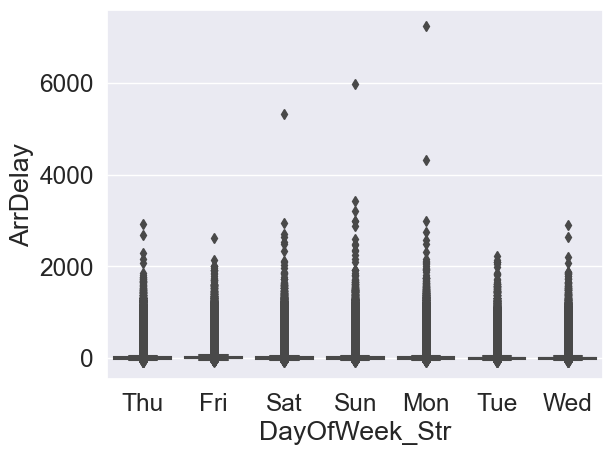

In [50]:
sns.boxplot(x="DayOfWeek_Str", y="ArrDelay", data=df)

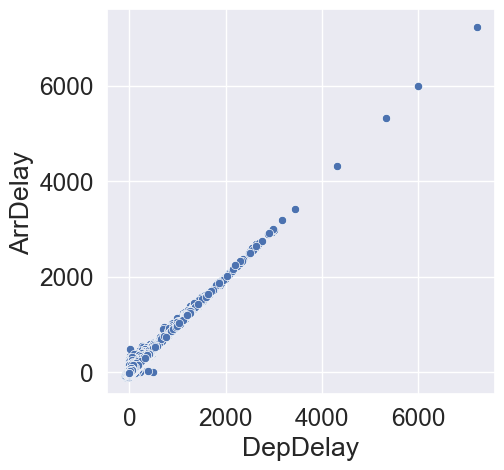

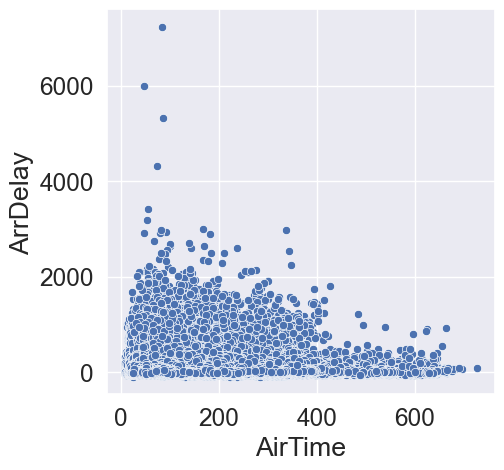

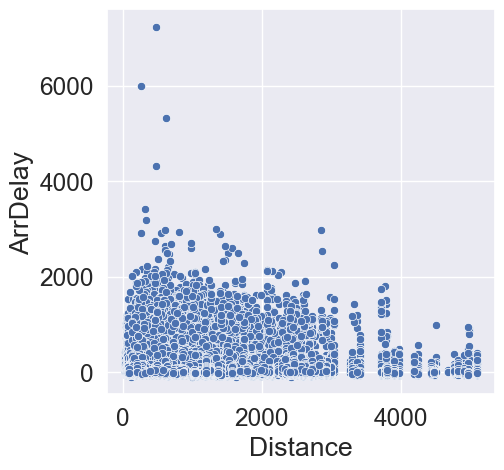

In [51]:
cols_2 = ["DepDelay", "AirTime", "Distance"]

for col in cols_2:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="ArrDelay", data=df)

plt.show()

# Which day is a better day to travel?

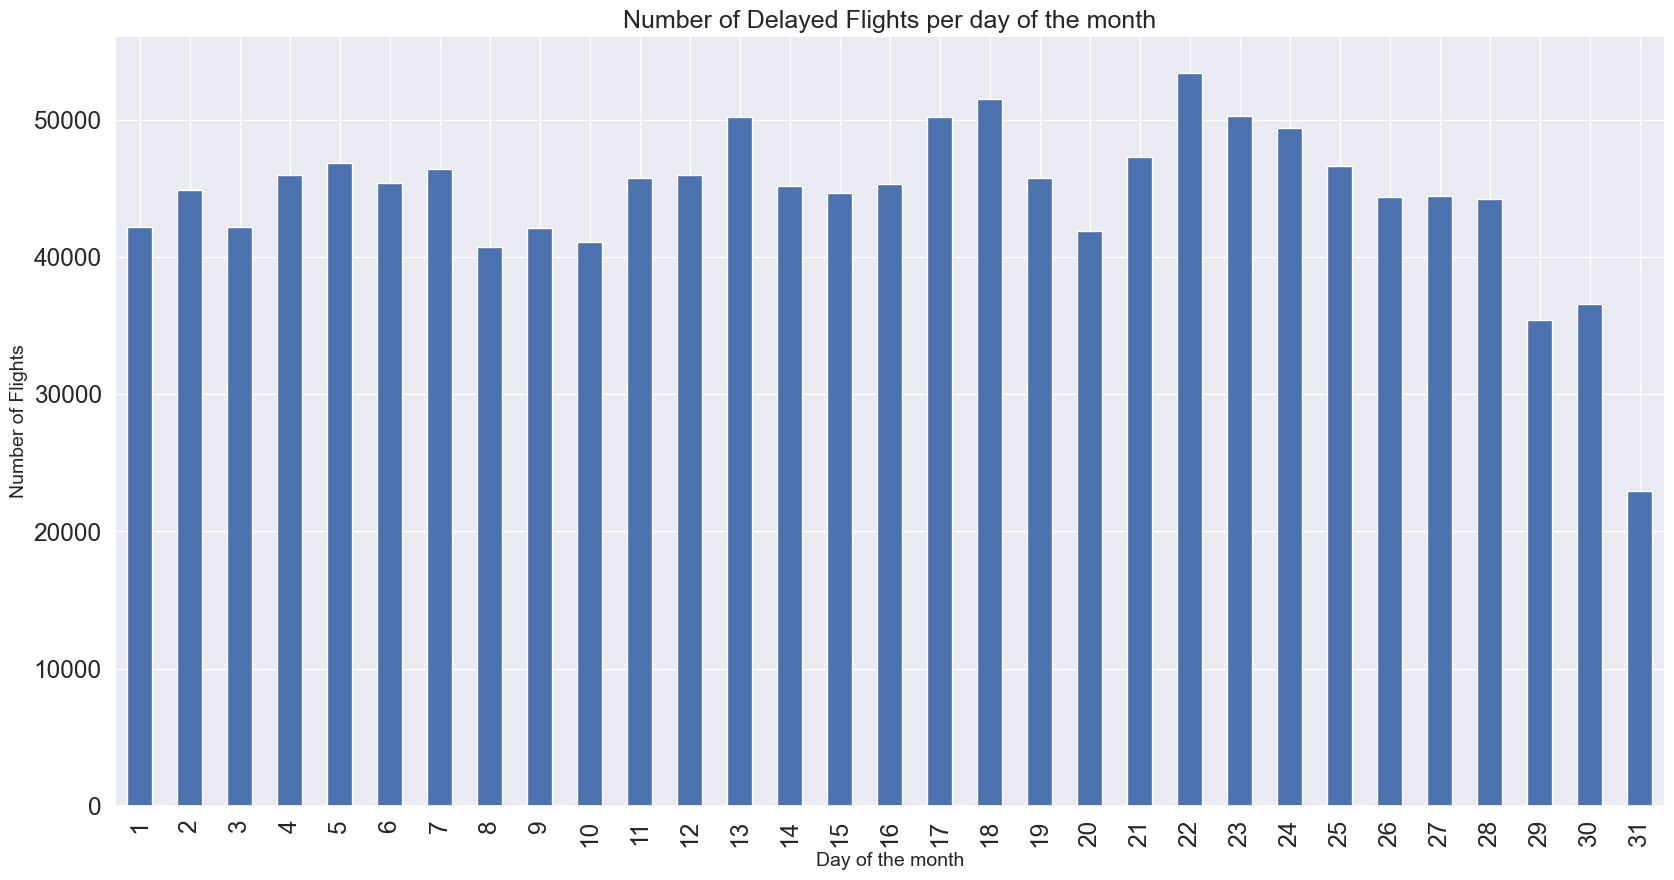

In [52]:
plt.figure(figsize=(20, 10))
df.groupby('DayofMonth').Flight_Status.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

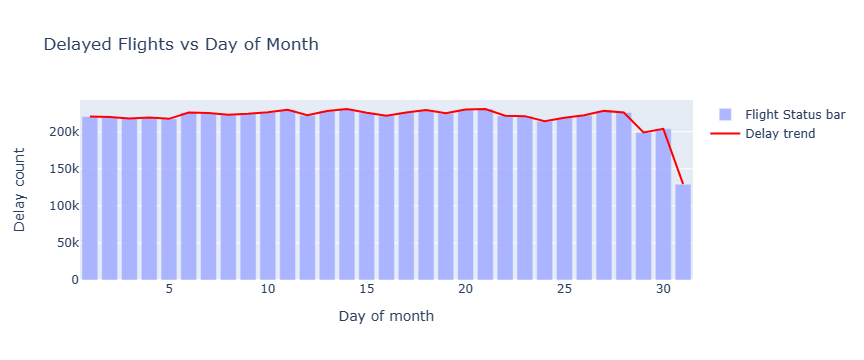

In [53]:
plot4 = df.groupby('DayofMonth')['Flight_Status'].count()
fig = go.Figure()

fig.add_trace(go.Bar(x=plot4.index, y=plot4.values, name='Flight Status bar',opacity=0.9,marker_color='#a5afff'))

fig.add_trace(go.Scatter(x=plot4.index, y=plot4.values, line=dict(color='red'), name='Delay trend'))
fig.update_layout(
    title="Delayed Flights vs Day of Month",
    xaxis_title="Day of month",
    yaxis_title="Delay count",
)
fig.show()

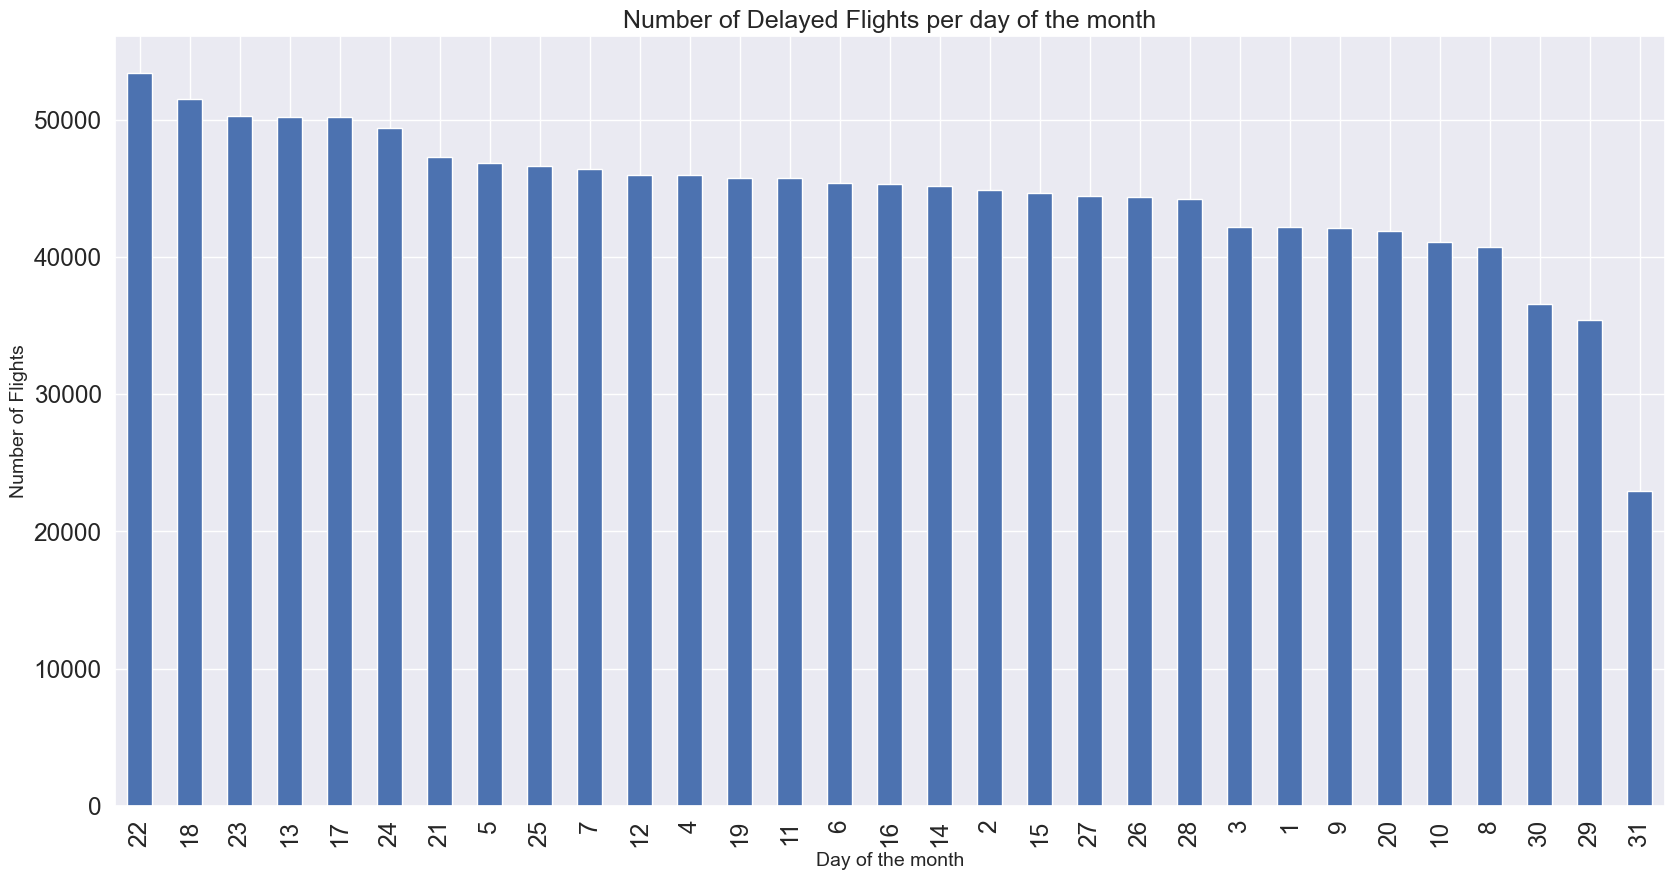

In [54]:
plt.figure(figsize=(20, 10))
barplot =df.groupby('DayofMonth').Flight_Status.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

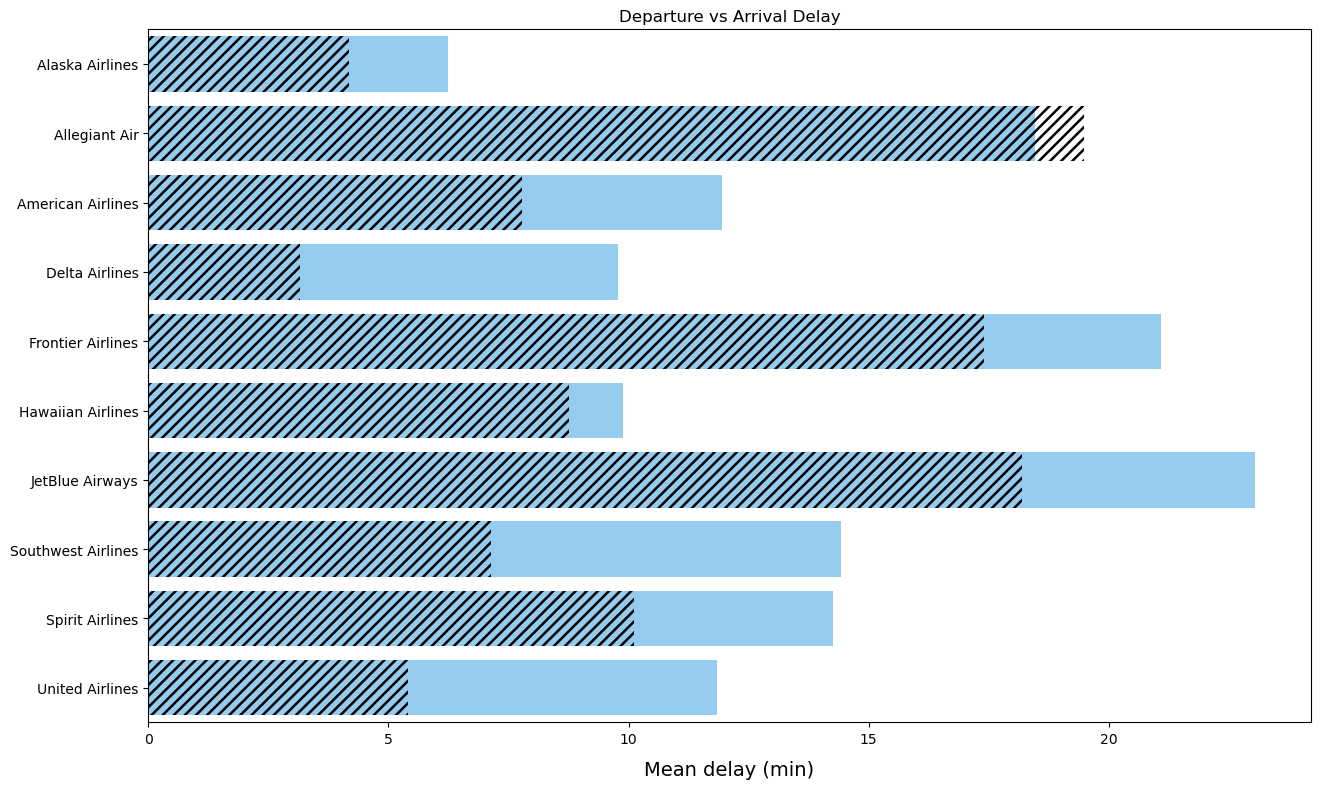

In [55]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DepDelay", y="Airlines", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ArrDelay", y="Airlines", data=df, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10)
plt.show()

In [56]:
df_ArrD = df[(df['ArrDelay'] > 15)]

In [57]:
df.shape

(6804006, 15)

In [58]:
df_ArrD.shape

(1378787, 15)

In [59]:
df_DepD = df[(df['DepDelay'] > 15)]
df_DepD.shape

(1386485, 15)

In [60]:
df_DepD.DepDelay.describe()

count    1.386485e+06
mean     6.975369e+01
std      9.701029e+01
min      1.600000e+01
25%      2.500000e+01
50%      4.200000e+01
75%      7.800000e+01
max      7.223000e+03
Name: DepDelay, dtype: float64

# Most Popular Destinations with Average Arrival Delays

In [61]:
dest_ar = df[['DestCityName', 'ArrDelay']]
dest_ar = dest_ar.groupby(['DestCityName']).mean().reset_index()
dest_ar.head(30)

DestCityName   ArrDelay
0                     Aberdeen, SD  -2.296403
1                      Abilene, TX   5.260355
2                  Adak Island, AK  -2.336634
3                    Aguadilla, PR  26.648451
4                        Akron, OH   8.652736
5                      Alamosa, CO  -3.489451
6                       Albany, GA   0.310021
7                       Albany, NY   8.790921
8                  Albuquerque, NM   7.191526
9                   Alexandria, LA   3.278146
10  Allentown/Bethlehem/Easton, PA   7.574630
11                      Alpena, MI   8.922185
12                    Amarillo, TX   6.496147
13                   Anchorage, AK   4.642962
14                    Appleton, WI   8.284166
15               Arcata/Eureka, CA   7.838346
16                   Asheville, NC   6.211329
17                     Ashland, WV   4.445438
18                       Aspen, CO  21.652680
19                     Atlanta, GA   3.366970
20               Atlantic City, NJ   7.953244
21                     Augusta, GA   3.286834
22                      Austin, TX   7.605308
23                 Bakersfield, CA  10.683423
24                   Baltimore, MD   6.566311
25                      Bangor, ME   4.445176
26                      Barrow, AK   9.981873
27                 Baton Rouge, LA   4.083410
28        Beaumont/Port Arthur, TX   1.107692
29                  Belleville, IL  14.313849

In [62]:
dest_ar.shape

(370, 2)

In [63]:
dest_f = df.DestCityName.value_counts().rename_axis('DestCityName').reset_index(name='Flights').iloc[0:30]
dest_f.head(30)

DestCityName  Flights
0             Chicago, IL   360585
1             Atlanta, GA   311987
2            New York, NY   292433
3              Denver, CO   270416
4   Dallas/Fort Worth, TX   267438
5          Washington, DC   212860
6           Charlotte, NC   208900
7             Houston, TX   195933
8         Los Angeles, CA   187969
9           Las Vegas, NV   171281
10            Seattle, WA   169857
11            Phoenix, AZ   167381
12            Orlando, FL   140838
13             Newark, NJ   139372
14             Boston, MA   133168
15      San Francisco, CA   127631
16            Detroit, MI   124692
17        Minneapolis, MN   117592
18     Salt Lake City, UT   108401
19              Miami, FL   103414
20       Philadelphia, PA   100817
21             Austin, TX    86888
22          Nashville, TN    85069
23          San Diego, CA    84116
24          Baltimore, MD    83207
25    Fort Lauderdale, FL    81491
26              Tampa, FL    70348
27             Dallas, TX    63553
28          St. Louis, MO    60248
29           Portland, OR    58086

In [64]:
dest_f_ar = pd.merge(dest_f, dest_ar, on='DestCityName')
dest_f_ar.head()

DestCityName  Flights   ArrDelay
0            Chicago, IL   360585   5.394459
1            Atlanta, GA   311987   3.366970
2           New York, NY   292433  10.748804
3             Denver, CO   270416   6.333042
4  Dallas/Fort Worth, TX   267438   9.581125

In [65]:
dest_f_ar.describe()

Flights   ArrDelay
count      30.000000  30.000000
mean   152865.700000   6.945968
std     81377.475457   3.255548
min     58086.000000   1.609460
25%     85523.750000   4.469730
50%    130399.500000   6.647773
75%    193942.000000   9.394673
max    360585.000000  13.969987

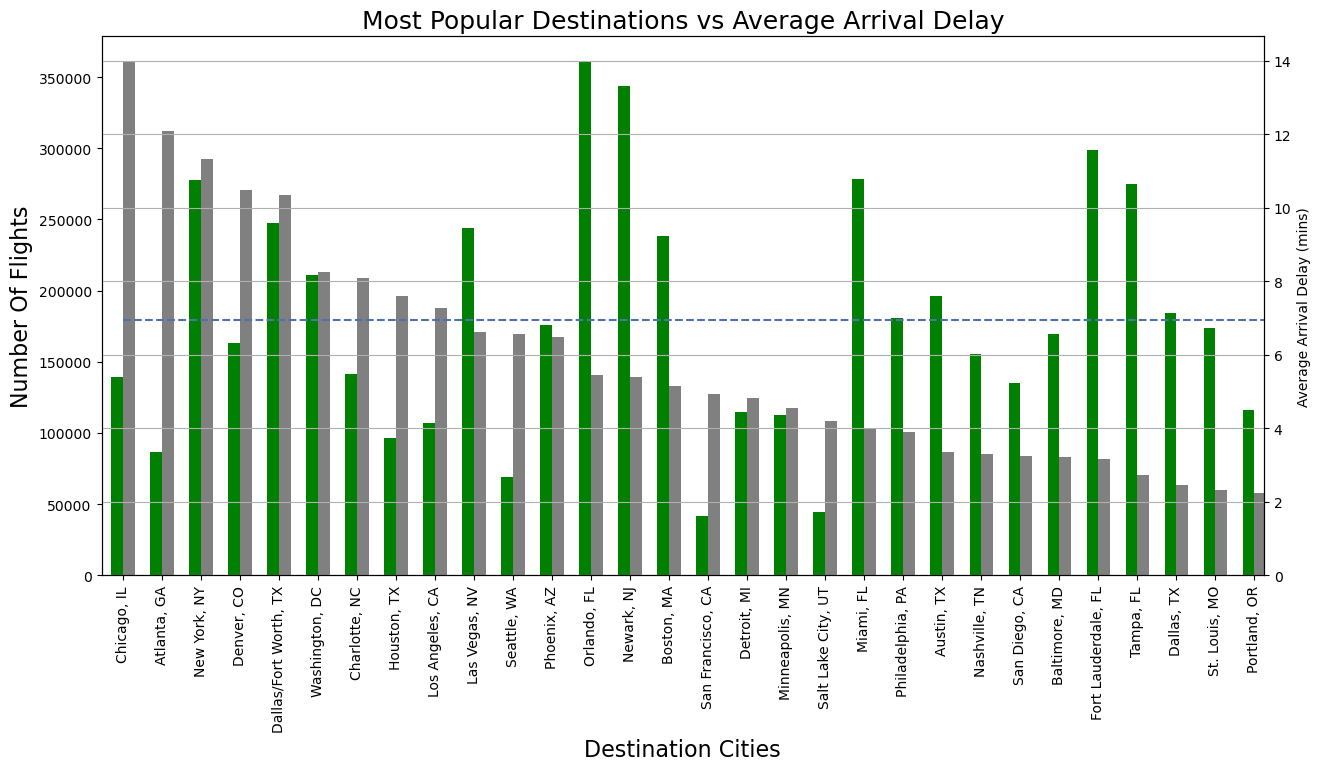

In [66]:
dest_f_ar = dest_f_ar.set_index('DestCityName')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

dest_f_ar.Flights.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
dest_f_ar.ArrDelay.plot(kind='bar',color='green', ax=ax2, width=width, position=1)

plt.hlines(y=6.95, xmin=0, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('Most Popular Destinations vs Average Arrival Delay', fontsize=18)
ax.set_ylabel('Number Of Flights', fontsize=16)
ax2.set_ylabel('Average Arrival Delay (mins)')
ax.set_xlabel('Destination Cities', fontsize=16)

plt.show()

# Departure Cities with the most Delayed Departure Flights

In [67]:
df.head()

Quarter  Month  DayofMonth  DayOfWeek  FlightDate        Airlines  \
0        1      1           6          4  2022-01-06  Delta Airlines   
1        1      1           6          4  2022-01-06  Delta Airlines   
2        1      1           6          4  2022-01-06  Delta Airlines   
3        1      1           6          4  2022-01-06  Delta Airlines   
4        1      1           6          4  2022-01-06  Delta Airlines   

          OriginCityName           DestCityName  DepDelay  ArrDelay  AirTime  \
0            Atlanta, GA    Fort Lauderdale, FL      -4.0      -1.0     93.0   
1    Fort Lauderdale, FL            Atlanta, GA      -2.0     -12.0     83.0   
2    Fort Lauderdale, FL     Raleigh/Durham, NC      -5.0     -15.0     93.0   
3            Atlanta, GA  Jackson/Vicksburg, MS      -4.0     -11.0     60.0   
4  Jackson/Vicksburg, MS            Atlanta, GA      -7.0     -23.0     49.0   

   Distance Month_Str DayOfWeek_Str  Flight_Status  
0     581.0       Jan           Thu              0  
1     581.0       Jan           Thu              0  
2     680.0       Jan           Thu              0  
3     341.0       Jan           Thu              0  
4     341.0       Jan           Thu              0

In [68]:
or_dep = df[['OriginCityName', 'DepDelay']]
or_dep = or_dep.groupby(['OriginCityName']).mean().reset_index()
or_dep.head(10)

OriginCityName   DepDelay
0     Aberdeen, SD   9.469154
1      Abilene, TX   7.022496
2  Adak Island, AK   7.762376
3    Aguadilla, PR  25.155045
4        Akron, OH   9.688916
5      Alamosa, CO   4.264706
6       Albany, GA   4.049061
7       Albany, NY  11.902136
8  Albuquerque, NM  11.015321
9   Alexandria, LA  14.208627

In [69]:
or_f = df.OriginCityName.value_counts().rename_axis('OriginCityName').reset_index(name='Flights').iloc[0:30]
or_f.head(30)

OriginCityName  Flights
0             Chicago, IL   361165
1             Atlanta, GA   311968
2            New York, NY   293034
3              Denver, CO   270909
4   Dallas/Fort Worth, TX   267926
5          Washington, DC   212839
6           Charlotte, NC   209036
7             Houston, TX   196218
8         Los Angeles, CA   187798
9           Las Vegas, NV   171356
10            Seattle, WA   170071
11            Phoenix, AZ   167575
12            Orlando, FL   141221
13             Newark, NJ   139755
14             Boston, MA   133043
15      San Francisco, CA   127590
16            Detroit, MI   124566
17        Minneapolis, MN   117519
18     Salt Lake City, UT   108270
19              Miami, FL   103597
20       Philadelphia, PA   100815
21             Austin, TX    86829
22          Nashville, TN    84860
23          San Diego, CA    83983
24          Baltimore, MD    83297
25    Fort Lauderdale, FL    81576
26              Tampa, FL    70407
27             Dallas, TX    63793
28          St. Louis, MO    60136
29           Portland, OR    58059

In [70]:
or_f_dep = pd.merge(or_f, or_dep, on='OriginCityName')
or_f_dep.head()

OriginCityName  Flights   DepDelay
0            Chicago, IL   361165  13.453773
1            Atlanta, GA   311968  10.611287
2           New York, NY   293034  15.862876
3             Denver, CO   270909  16.959883
4  Dallas/Fort Worth, TX   267926  14.273128

In [71]:
or_f_dep.shape

(30, 3)

In [72]:
or_f_dep.describe()

Flights   DepDelay
count      30.000000  30.000000
mean   152973.700000  13.005234
std     81519.168893   3.275143
min     58059.000000   7.160819
25%     85352.250000  10.201255
50%    130316.500000  13.222502
75%    194113.000000  15.692714
max    361165.000000  18.803655

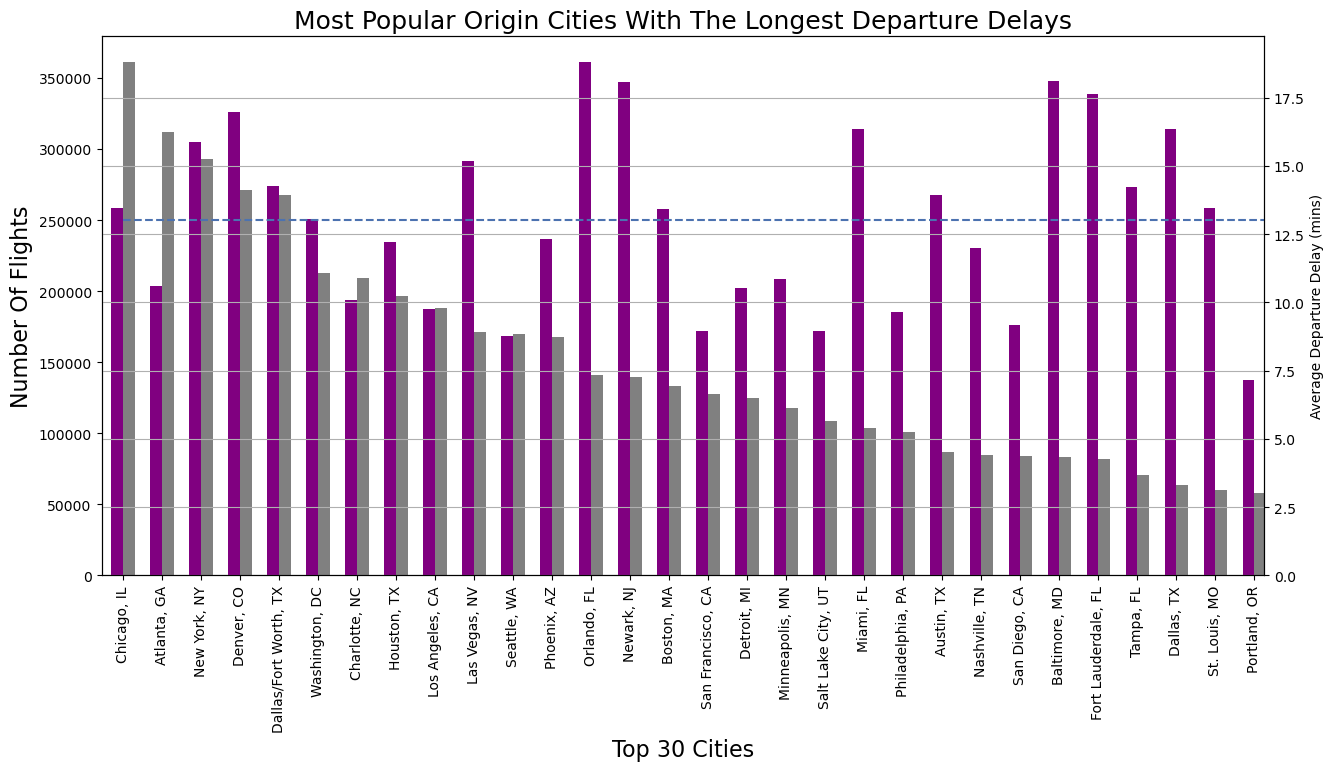

In [73]:
or_f_dep = or_f_dep.set_index('OriginCityName')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

or_f_dep.Flights.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
or_f_dep.DepDelay.plot(kind='bar',color='purple', ax=ax2, width=width, position=1)

plt.hlines(y=13, xmin=0, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('Most Popular Origin Cities With The Longest Departure Delays', fontsize=18)
ax.set_ylabel('Number Of Flights', fontsize=16)
ax2.set_ylabel('Average Departure Delay (mins)')
ax.set_xlabel('Top 30 Cities', fontsize=16)
plt.show()

In [74]:
df_1 = pd.merge(fs_tf, Avg_D, on='Airlines')
df_1.head(3)

Airlines  Delayed_Flights  Total_Flights  Percentage_Delayed  \
0    Alaska Airlines            67740         373159               18.15   
1      Allegiant Air            37221         112466               33.10   
2  American Airlines           336683        1704516               19.75   

   Avg_Delay  
0   4.171707  
1  19.482973  
2   7.781472

In [75]:
Air_Ar = df[['Airlines', 'ArrDelay']]
Air_Ar.head(2)

Airlines  ArrDelay
0  Delta Airlines      -1.0
1  Delta Airlines     -12.0

In [76]:
Air_Ar.shape

(6804006, 2)

In [77]:
Air_Ar = Air_Ar.groupby('Airlines').sum().sort_values(by=['ArrDelay']).reset_index()
Air_Ar.rename({'ArrDelay': 'Total_Delay_Min'}, axis=1, inplace=True)

In [78]:
df_1 = pd.merge(df_1, Air_Ar, on='Airlines')
df_1 = df_1.sort_values(by=['Total_Flights'], ascending=False)
df_1.head(18)

Airlines  Delayed_Flights  Total_Flights  Percentage_Delayed  \
2   American Airlines           336683        1704516               19.75   
3      Delta Airlines           219187        1416198               15.48   
7  Southwest Airlines           294255        1261273               23.33   
9     United Airlines           223760        1225936               18.25   
0     Alaska Airlines            67740         373159               18.15   
6     JetBlue Airways            83323         261821               31.82   
8     Spirit Airlines            53730         225008               23.88   
4   Frontier Airlines            46677         150743               30.96   
1       Allegiant Air            37221         112466               33.10   
5   Hawaiian Airlines            16211          72886               22.24   

   Avg_Delay  Total_Delay_Min  
2   7.781472       13263644.0  
3   3.171600        4491614.0  
7   7.136936        9001625.0  
9   5.405376        6626645.0  
0   4.171707        1556710.0  
6  18.181891        4760401.0  
8  10.112618        2275420.0  
4  17.393756        2621987.0  
1  19.482973        2191172.0  
5   8.759556         638449.0

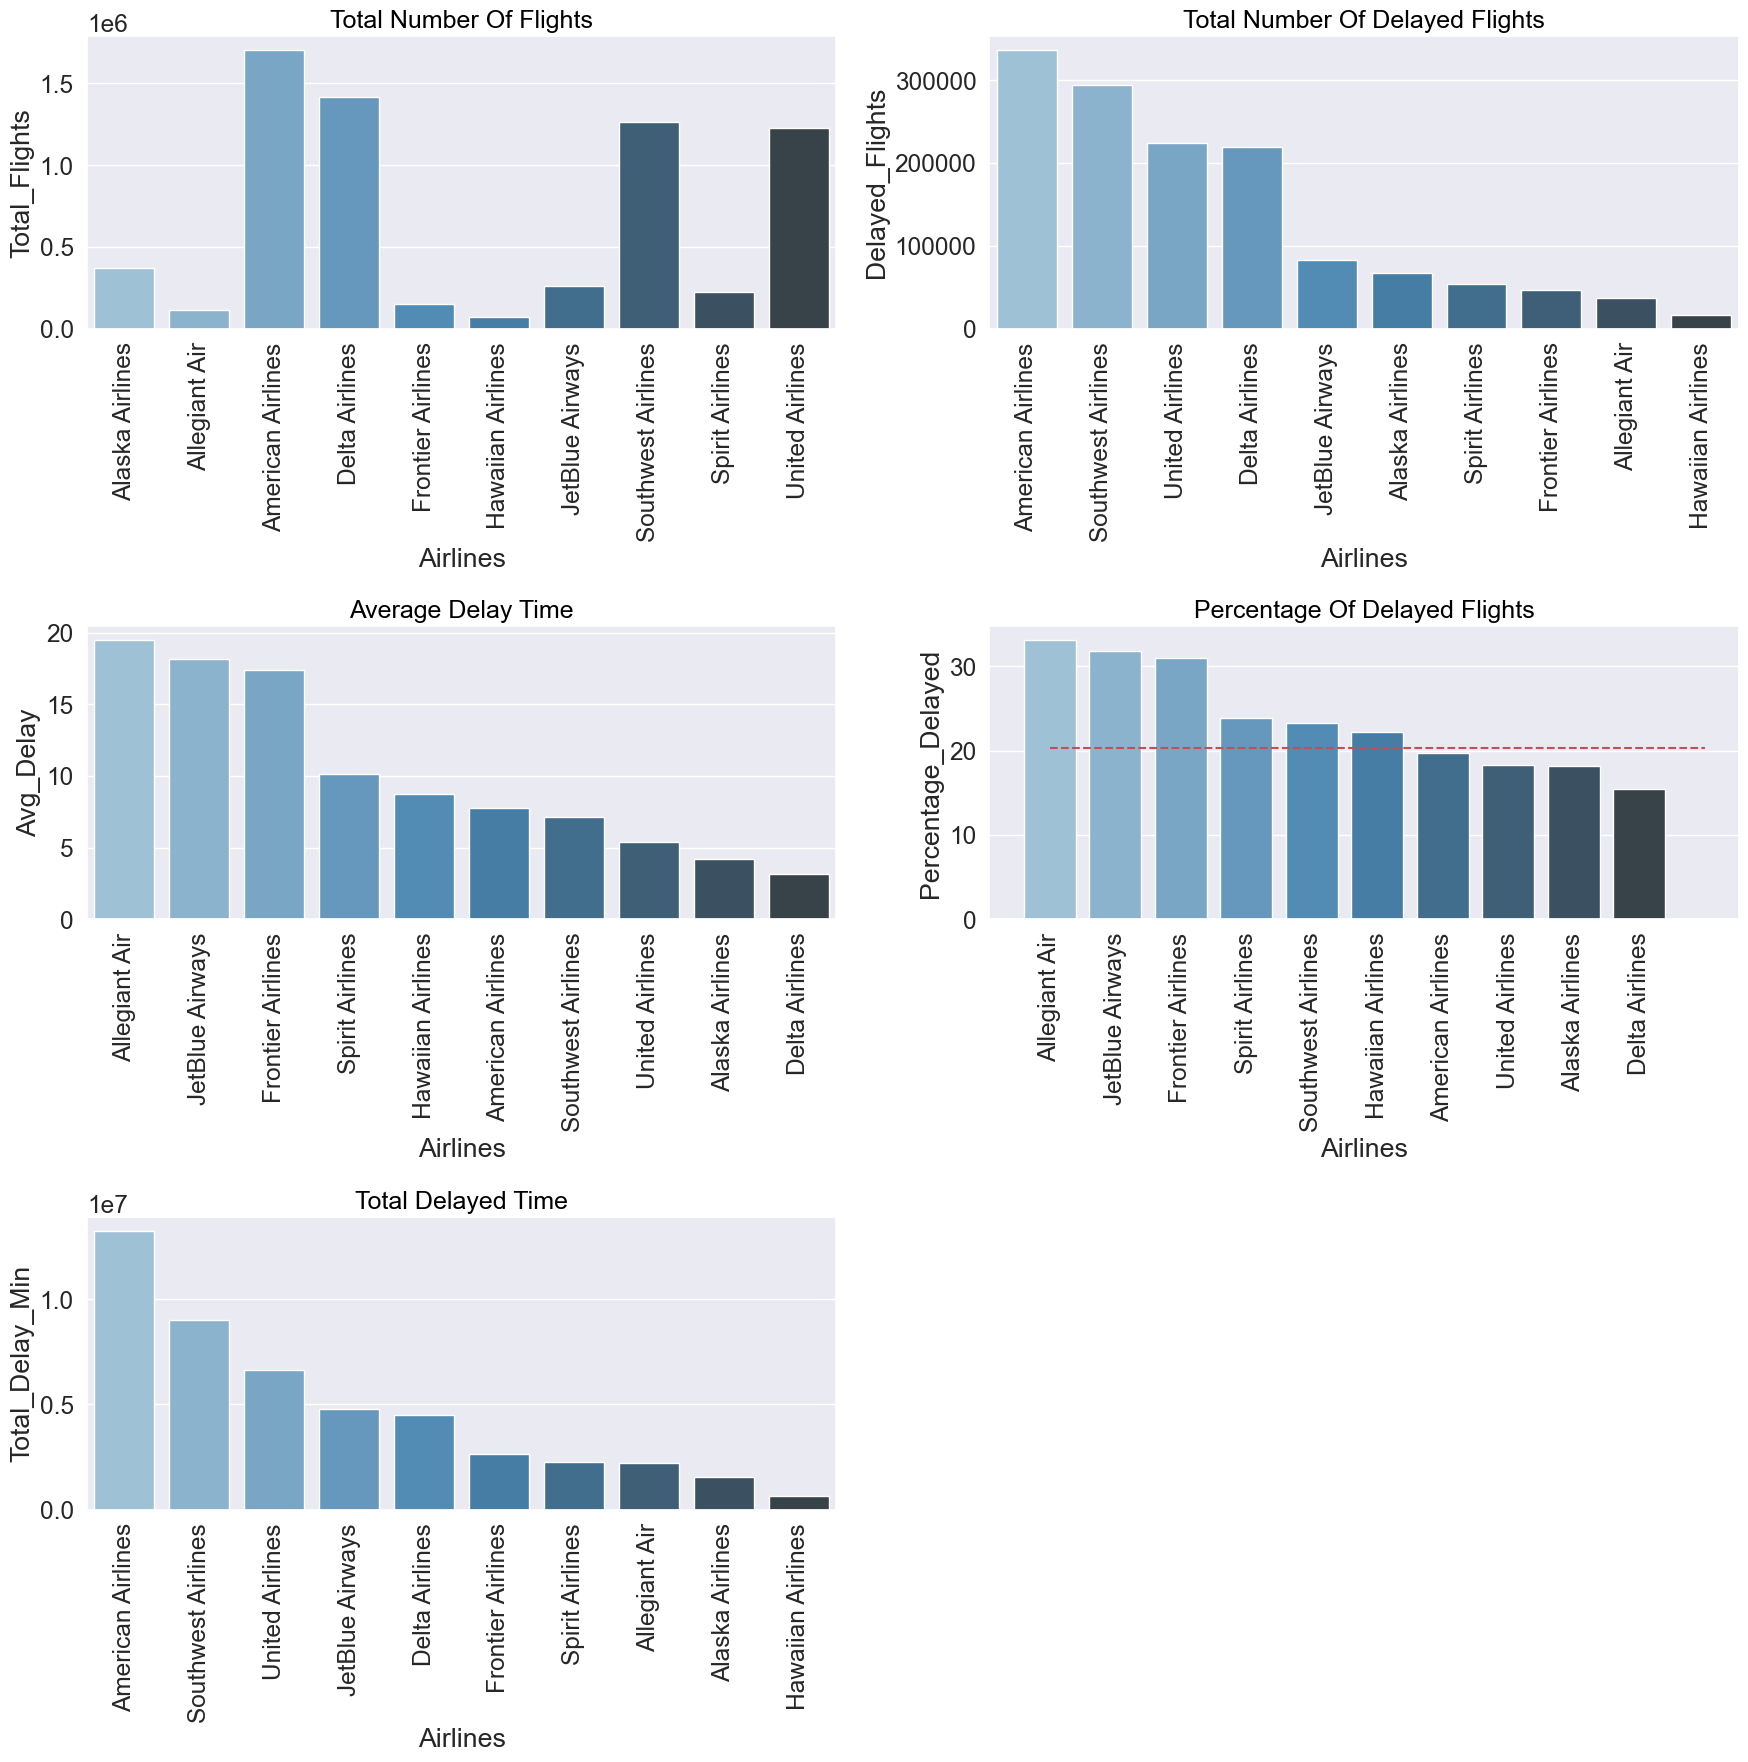

In [79]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('Total Number Of Flights', fontsize=18, color="black")
sub1 = sns.barplot(x="Airlines", y="Total_Flights", data=df_1, palette="Blues_d", ax=sub1)
#sub1 = sns.barplot(x="Airlines", y="Total_Flights", data=df_1, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df_1.Airlines], ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('Total Number Of Delayed Flights', fontsize=18, color="black")
sub2 = sns.barplot(x="Airlines", y="Delayed_Flights", data=df_1, order=df_1.sort_values('Delayed_Flights', ascending=False).Airlines, palette="Blues_d", ax=sub2)
#sub2 = sns.barplot(x="Airlines", y="Delayed_Flights", data=df_1, order=df_1.sort_values('Delayed_Flights', ascending=False).Airlines, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df_1.Airlines], ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('Average Delay Time', fontsize=18, color="black")
sub3 = sns.barplot(x="Airlines", y="Avg_Delay", data=df_1, order=df_1.sort_values('Avg_Delay', ascending=False).Airlines, palette="Blues_d", ax=sub3)
#sub3 = sns.barplot(x="Airlines", y="Avg_Delay", data=df_1, order=df_1.sort_values('Avg_Delay', ascending=False).Airlines, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df_1.Airlines], ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('Percentage Of Delayed Flights', fontsize=18, color="black")
sub4 = sns.barplot(x="Airlines", y="Percentage_Delayed", data=df_1, order=df_1.sort_values('Percentage_Delayed', ascending=False).Airlines, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=20.26, xmin=0, xmax=10, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('Total Delayed Time', fontsize=18, color="black")
sub5 = sns.barplot(x="Airlines", y="Total_Delay_Min", data=df_1, order=df_1.sort_values('Total_Delay_Min', ascending=False).Airlines, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)


fig.tight_layout()

plt.show()